# Data Dictionary

# [Link to dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance)

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-za14{border-color:inherit;text-align:left;vertical-align:bottom}
.tg .tg-7zrl{text-align:left;vertical-align:bottom}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-za14">Column Name</th>
    <th class="tg-7zrl">Description</th>
    <th class="tg-7zrl">Data Type</th>
    <th class="tg-0lax">Possible Values / Range</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-7zrl">age</td>
    <td class="tg-7zrl">Age of the primary beneficiary.</td>
    <td class="tg-7zrl">Numerical</td>
    <td class="tg-0lax">Integer (e.g., 18-64+)</td>
  </tr>
  <tr>
    <td class="tg-7zrl">sex</td>
    <td class="tg-7zrl">Insurance contractor's gender.</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl">female, male</td>
  </tr>
  <tr>
    <td class="tg-7zrl">bmi</td>
    <td class="tg-7zrl">Body Mass Index (kg/m²), indicates body weight relative to height. Ideally 18.5 to 24.9.</td>
    <td class="tg-7zrl">Numerical</td>
    <td class="tg-0lax">Float (e.g., 15.96 - 53.13)</td>
  </tr>
  <tr>
    <td class="tg-7zrl">children</td>
    <td class="tg-7zrl">Number of children covered by health insurance, or number of dependents.</td>
    <td class="tg-7zrl">Numerical</td>
    <td class="tg-0lax">Integer (e.g., 0-5)</td>
  </tr>
  <tr>
    <td class="tg-7zrl">smoker</td>
    <td class="tg-7zrl">Indicates whether the beneficiary is a smoker.</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl">yes, no</td>
  </tr>
  <tr>
    <td class="tg-7zrl">region</td>
    <td class="tg-7zrl">The beneficiary's residential area in the US.</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-0lax">northeast, southeast, southwest, northwest</td>
  </tr>
  <tr>
    <td class="tg-7zrl">charges</td>
    <td class="tg-7zrl">Individual medical costs billed by health insurance.</td>
    <td class="tg-7zrl">Numerical</td>
    <td class="tg-0lax">Float (e.g., 1121.87 - 63770.43)</td>
  </tr>
</tbody></table>

# Import necessary Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [2]:
!pip install optuna
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import optuna
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Load Dataset

In [3]:
# reading data
df = pd.read_csv('/kaggle/input/insurance/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Split Dataset

In [4]:
from sklearn.model_selection import train_test_split
x = df.drop('charges', axis=1) 
y = df['charges'] 

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

# Print the shapes of the resulting sets
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1070, 6)
y_train shape: (1070,)
X_test shape: (268, 6)
y_test shape: (268,)


# EDA

In [5]:
x_train.head()

,age,sex,bmi,children,smoker,region
560,46,female,19.95,2,no,northwest
1285,47,female,24.32,0,no,northeast
1142,52,female,24.86,0,no,southeast
969,39,female,34.32,5,no,southeast
486,54,female,21.47,3,no,northwest


In [6]:
x_train.describe()

,age,bmi,children
count,1070.000000,1070.000000,1070.000000
mean,39.357009,30.560397,1.107477
std,14.073960,6.043386,1.215983
min,18.000000,15.960000,0.000000
25%,27.000000,26.205000,0.000000
50%,39.500000,30.210000,1.000000
75%,51.000000,34.496250,2.000000
max,64.000000,53.130000,5.000000


In [7]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1070 entries, 560 to 1126
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1070 non-null   int64  
 1   sex       1070 non-null   object 
 2   bmi       1070 non-null   float64
 3   children  1070 non-null   int64  
 4   smoker    1070 non-null   object 
 5   region    1070 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 58.5+ KB


In [8]:
x_train.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

In [9]:
y_train.head()

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
Name: charges, dtype: float64

In [10]:
y_train.isnull().sum()

0

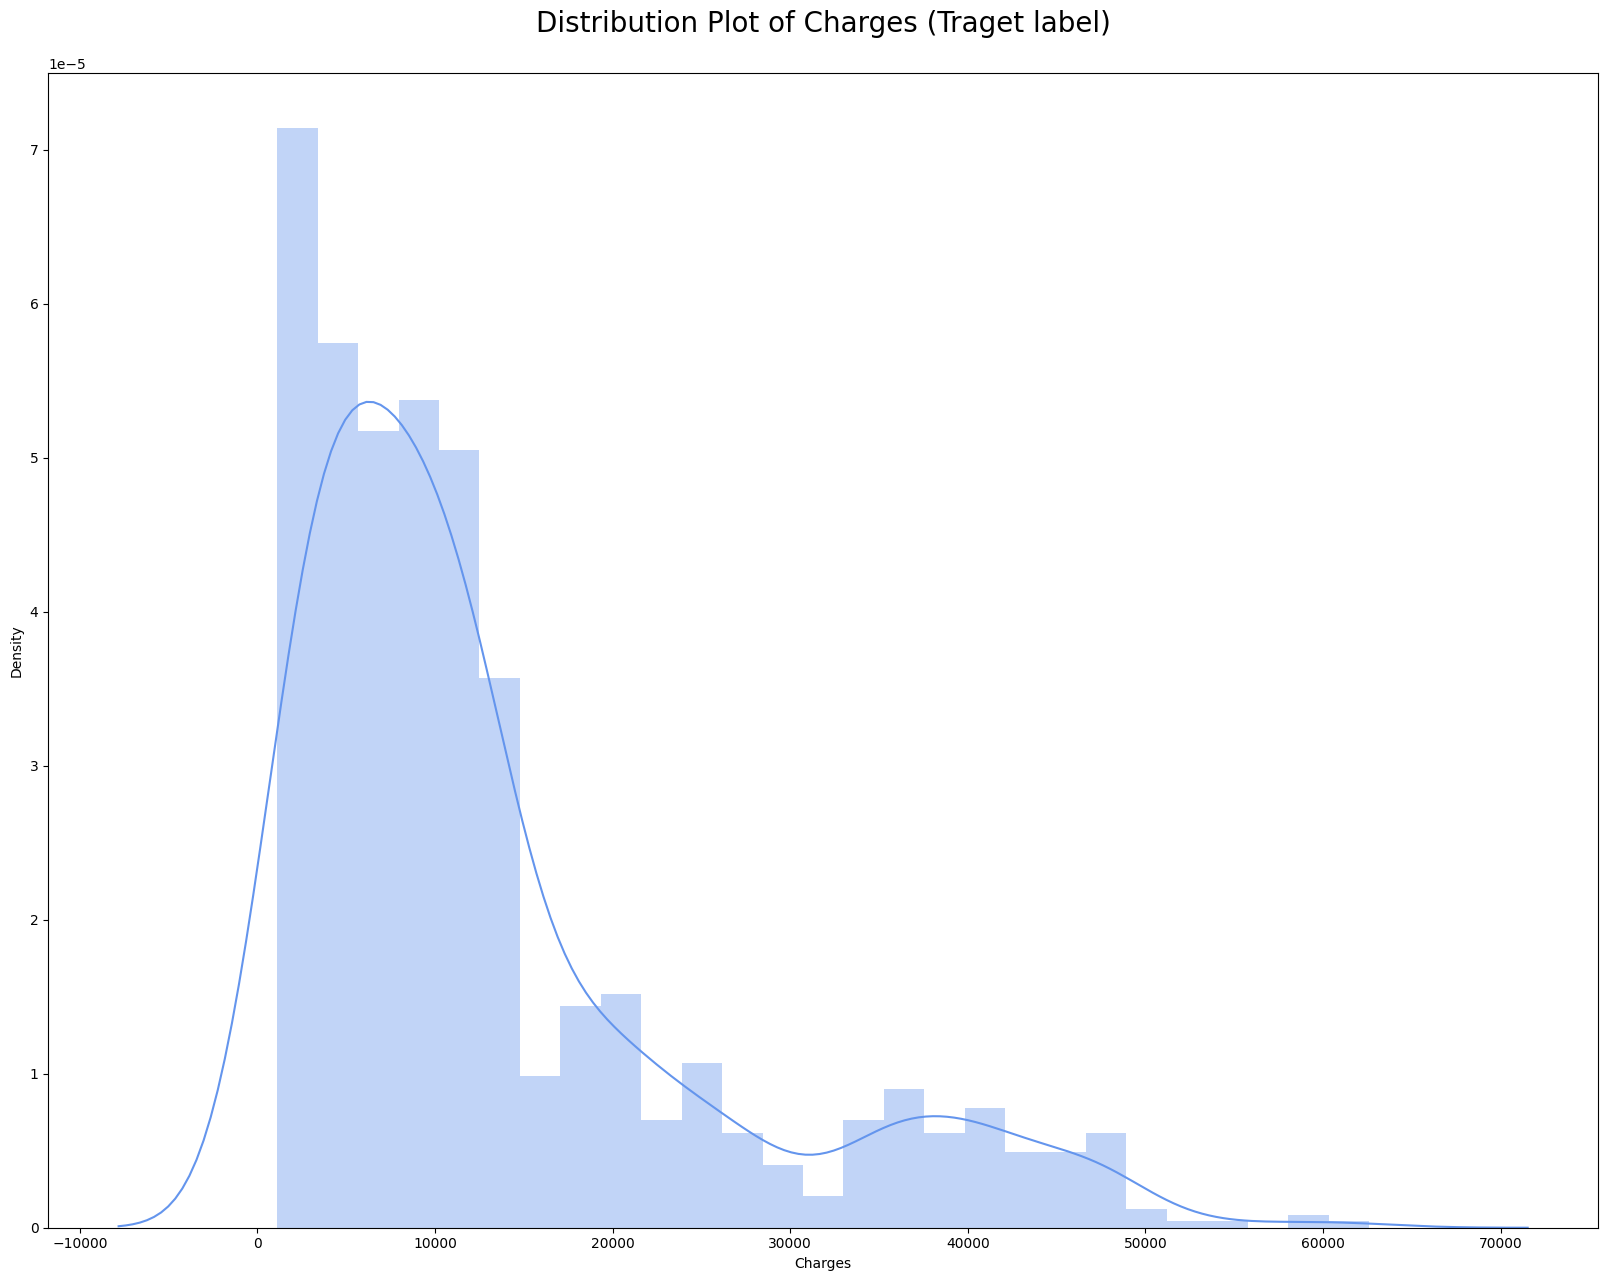

In [11]:
plt.figure(figsize=(20, 15))
sns.distplot(y_train, color='cornflowerblue') # Change palette to color
plt.title('Distribution Plot of Charges (Traget label)\n', fontsize=20)
plt.xlabel('Charges')  # Add x-label for clarity
plt.ylabel('Density')  # Add y-label for clarity
plt.show()

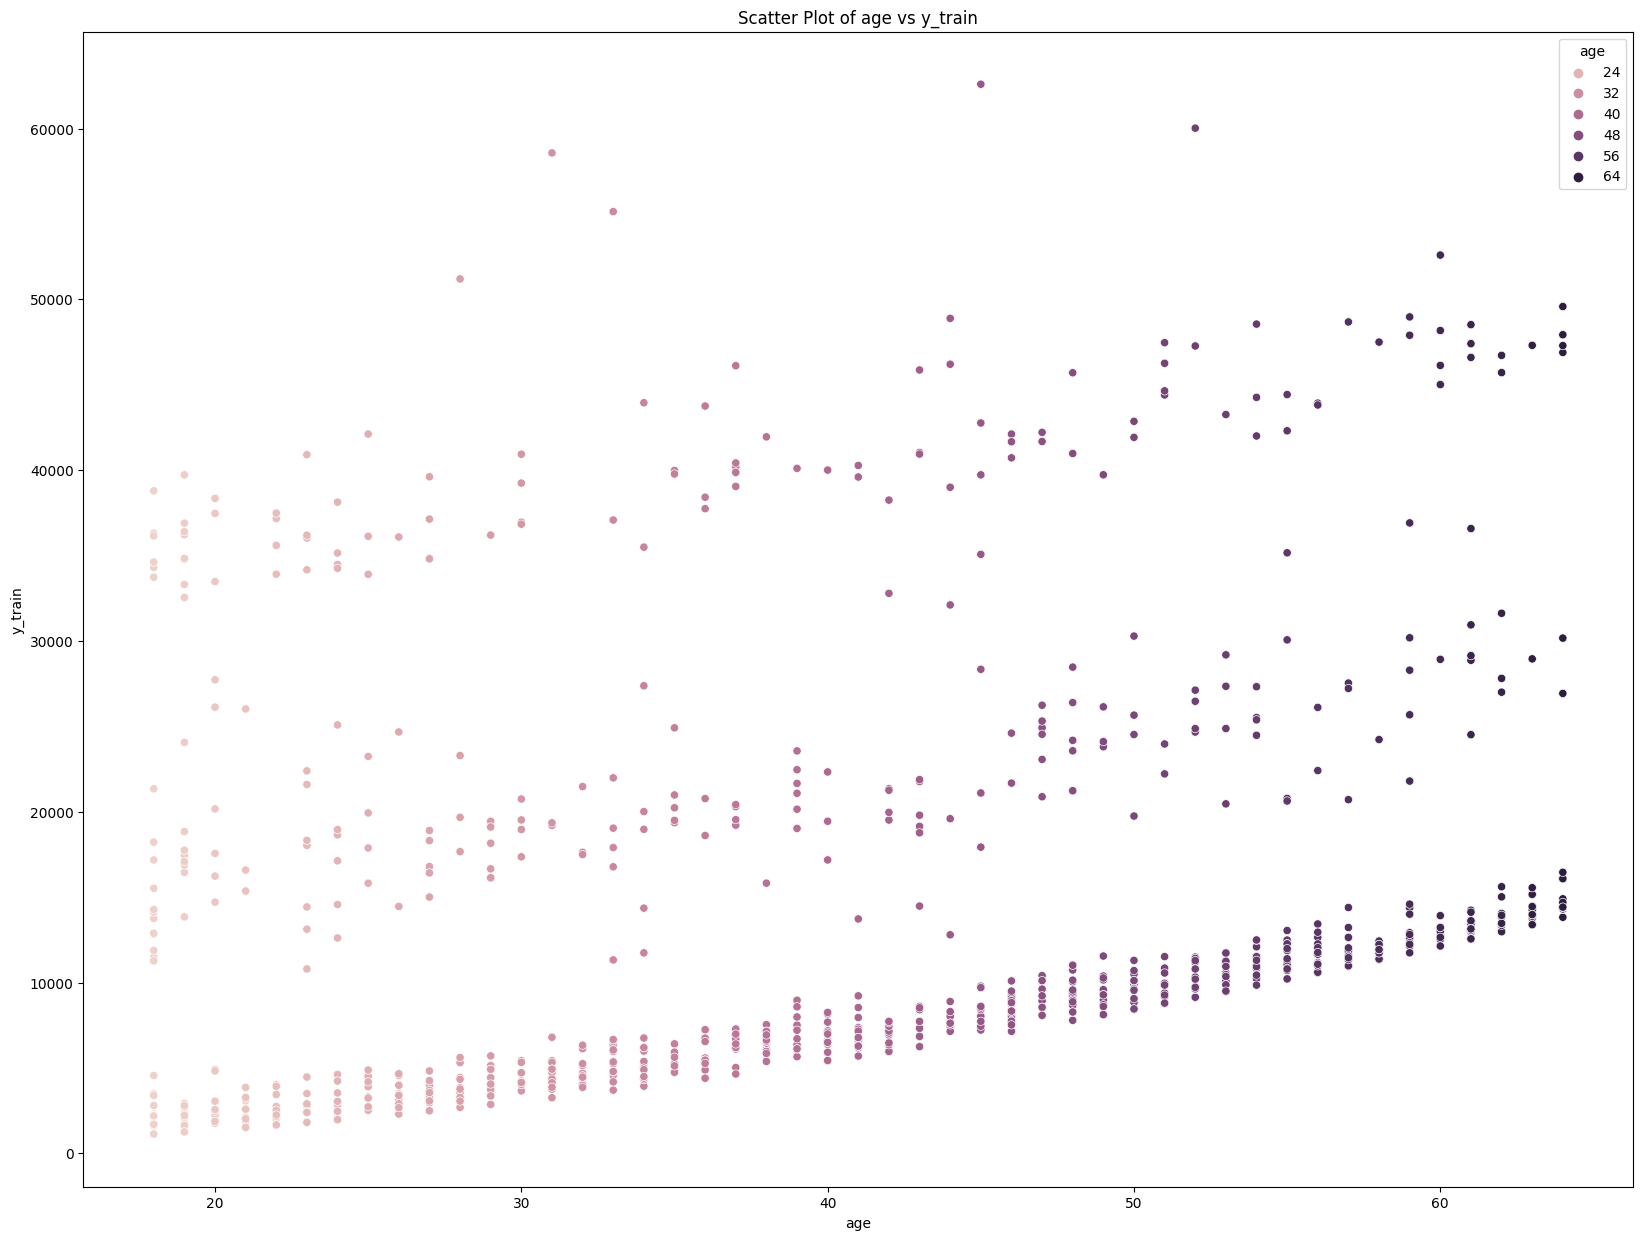

In [12]:
# Create scatter plot with figure size 20x15
plt.figure(figsize=(20, 15)) # Define the figure size using matplotlib
sns.scatterplot(data=x_train, x='age', y=y_train, hue='age') # Create the scatterplot using seaborn
plt.xlabel('age')
plt.ylabel('y_train')
plt.title('Scatter Plot of age vs y_train')
plt.show()

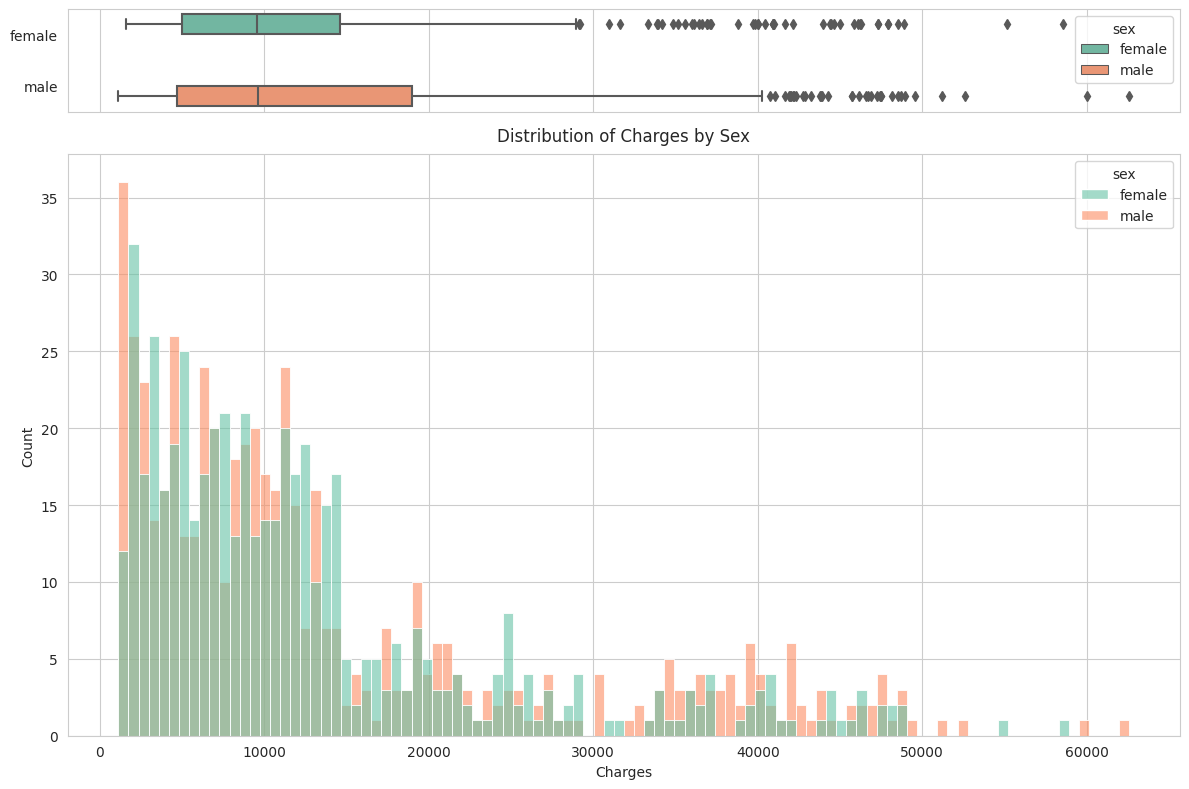

In [13]:
# Combine x_train and y_train into a single DataFrame for Seaborn
data = x_train.copy()
data['charges'] = y_train

# Set the Seaborn style to whitegrid
sns.set_style("whitegrid")

# Create a figure with two subplots (stacked vertically)
fig, (ax_box, ax_hist) = plt.subplots(
    2, 1,
    figsize=(12, 8),
    sharex=True,
    gridspec_kw={"height_ratios": (0.15, 0.85)}
)

# Plot 1: Box plot (marginal) for 'charges' by 'sex'
sns.boxplot(
    data=data,
    x="charges",
    y="sex",
    hue="sex",
    ax=ax_box,
    palette="Set2"
)
ax_box.set(xlabel="", ylabel="")

# Plot 2: Histogram of 'charges' colored by 'sex'
sns.histplot(
    data=data,
    x="charges",
    hue="sex",
    bins=100,
    ax=ax_hist,
    palette="Set2",
    alpha=0.6
)
ax_hist.set_xlabel("Charges")
ax_hist.set_ylabel("Count")

ax_hist.set_title("Distribution of Charges by Sex", pad=10)

plt.tight_layout()

plt.show()


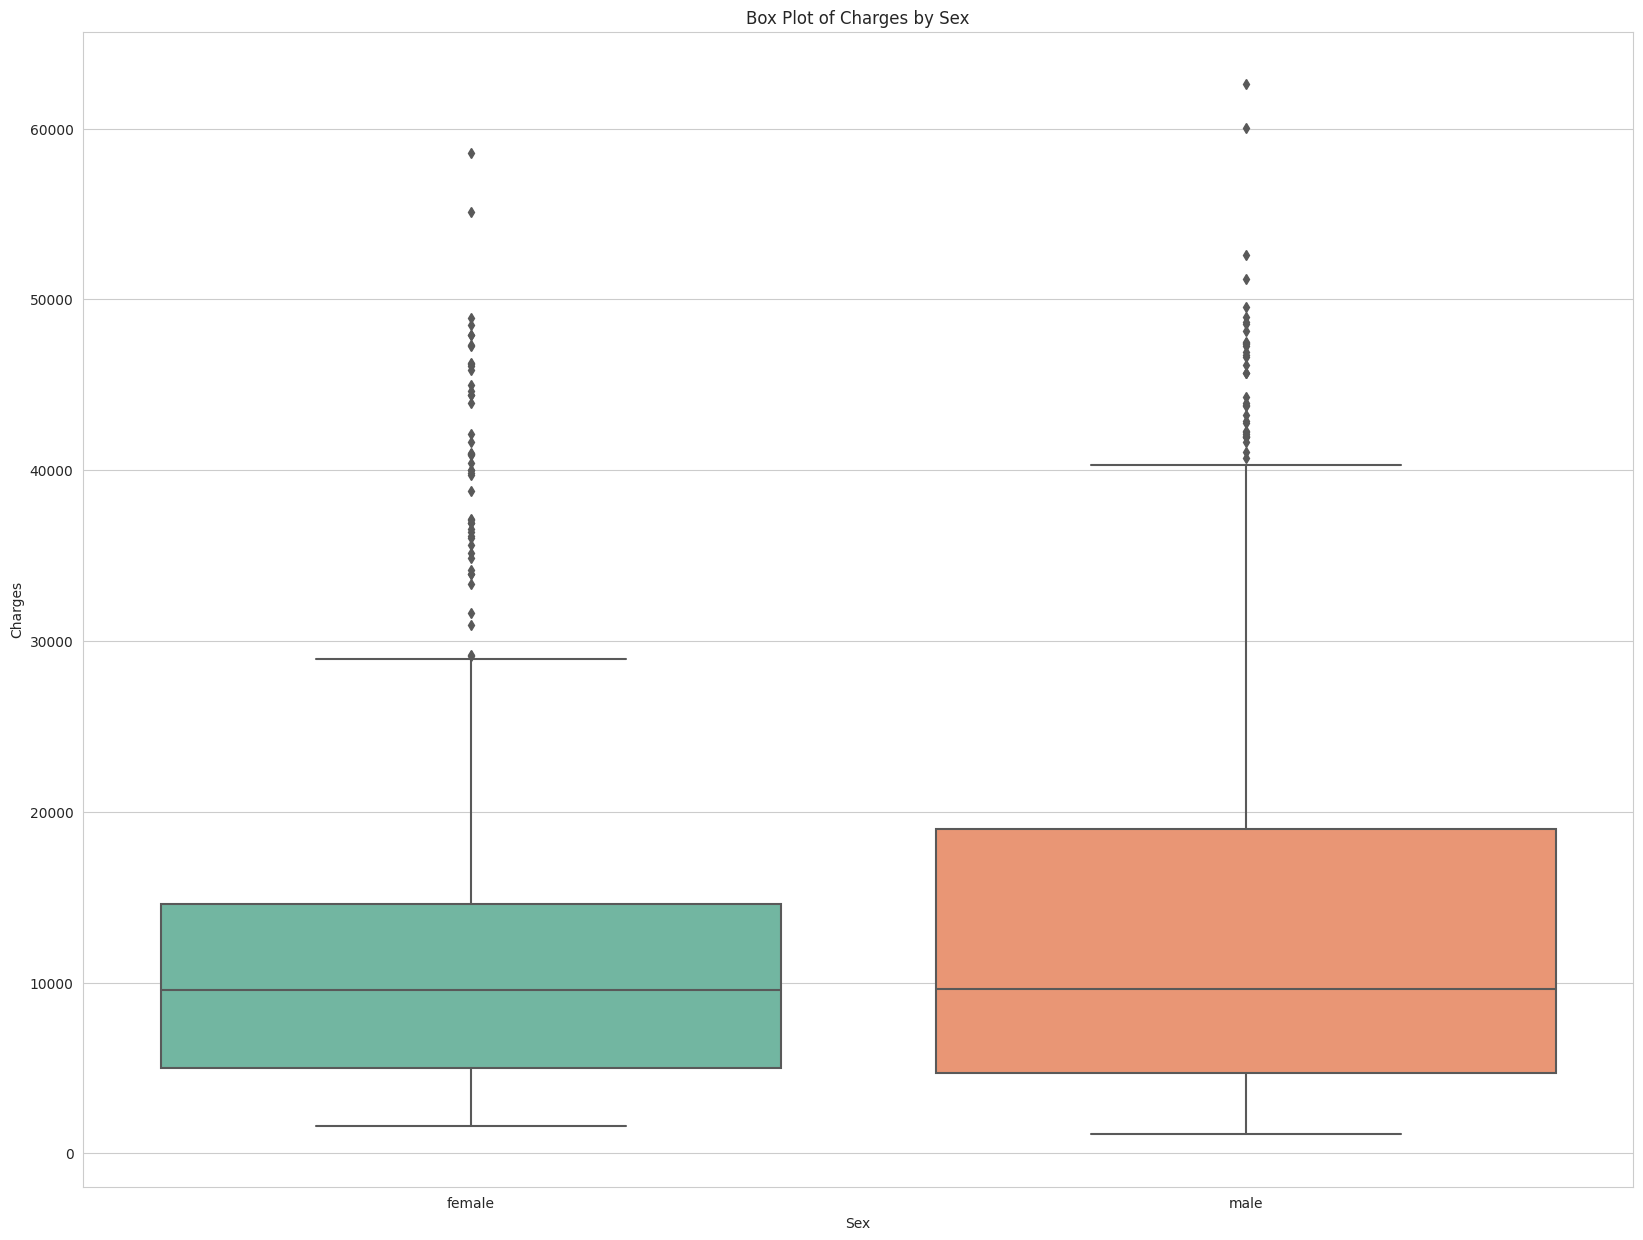

In [14]:
# Set the Seaborn style
sns.set_style("whitegrid") # Change to whitegrid

# Create the figure
plt.figure(figsize=(20, 15))

# Create the box plot
sns.boxplot(
    data=data,
    x="sex",
    y="charges",
    palette="Set2"
)

# Set labels and title
plt.xlabel("Sex")
plt.ylabel("Charges")
plt.title("Box Plot of Charges by Sex")

# Show the plot
plt.show()

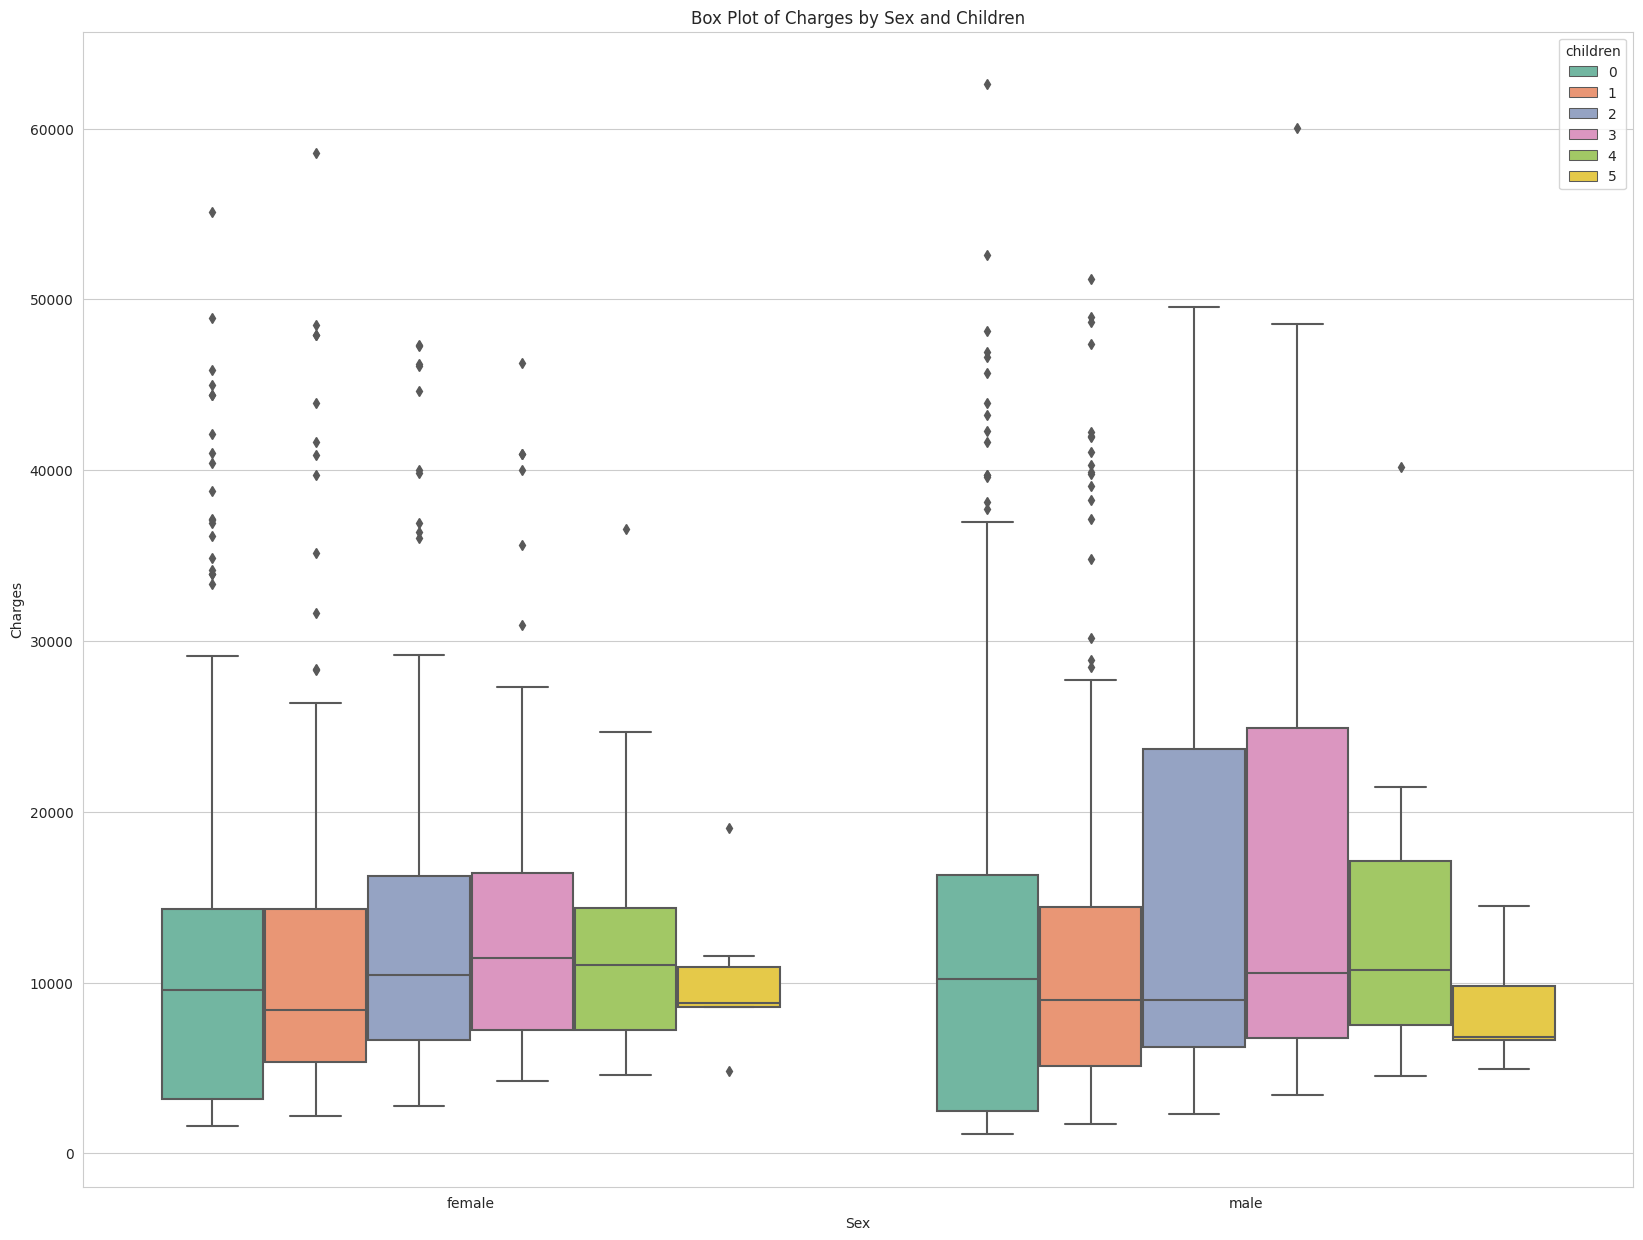

In [15]:
# Set the Seaborn style
sns.set_style("whitegrid") # Change to whitegrid

# Create the figure
plt.figure(figsize=(20, 15))

# Create the box plot
sns.boxplot(
    data=data,
    x="sex",
    y="charges",
    hue="children",
    palette="Set2"
)

# Set labels and title
plt.xlabel("Sex")
plt.ylabel("Charges")
plt.title("Box Plot of Charges by Sex and Children")

# Show the plot
plt.show()

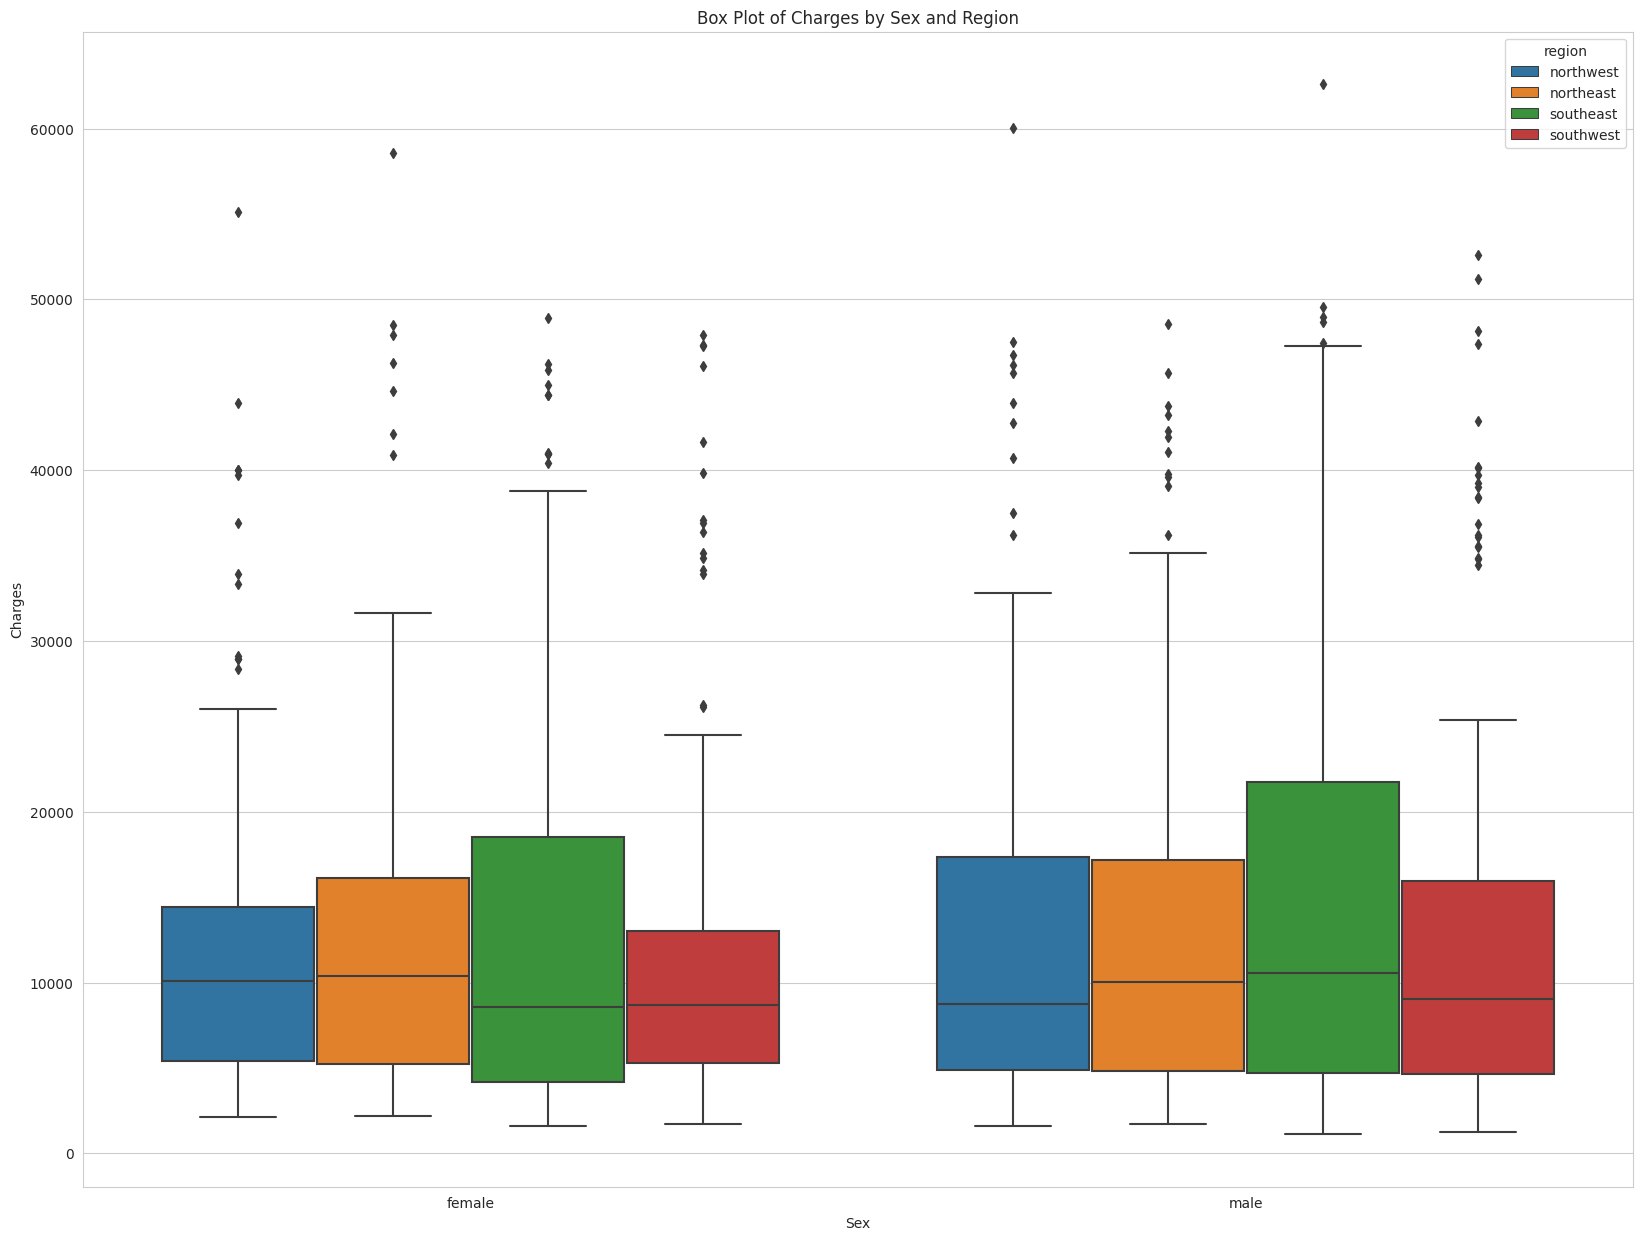

In [16]:
# Create the box plot using seaborn
plt.figure(figsize=(20, 15))  # Adjust figure size to match height=6, aspect=2 of catplot
sns.boxplot(x='sex', y='charges', hue='region', data=data)

# Set labels and title
plt.xlabel("Sex")
plt.ylabel("Charges")
plt.title("Box Plot of Charges by Sex and Region")

# Show the plot
plt.show()

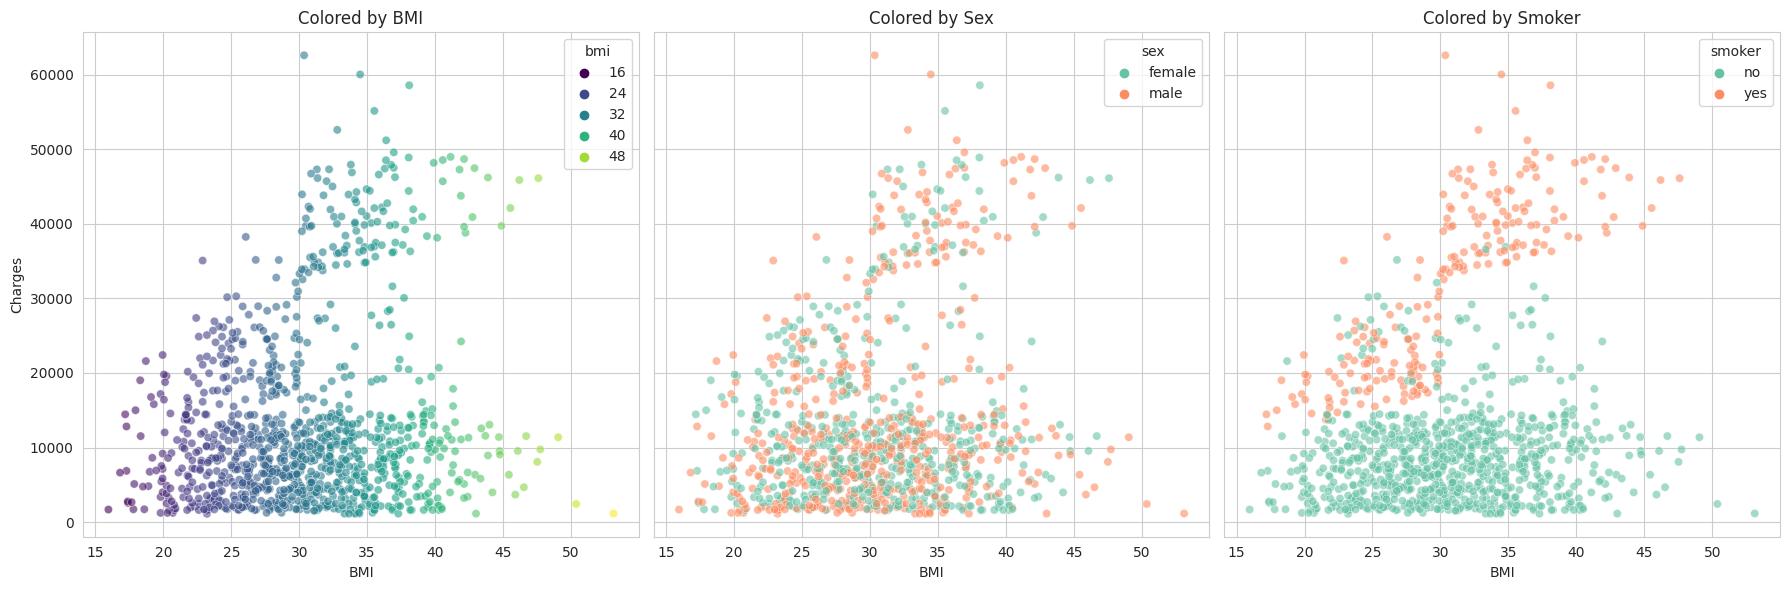

In [17]:
# Create a figure with 1 row and 3 columns of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# List of hue variables and their titles
hue_vars = [('bmi', 'Colored by BMI'), ('sex', 'Colored by Sex'), ('smoker', 'Colored by Smoker')]

# Create scatter plots for each hue variable
for ax, (hue_var, title) in zip(axes, hue_vars):
    sns.scatterplot(
        data=data,
        x="bmi",
        y="charges",
        hue=hue_var,  # Color by bmi, sex, or smoker
        palette="viridis" if hue_var == 'bmi' else "Set2",  # Use viridis for continuous bmi, Set2 for categorical
        ax=ax,
        alpha=0.6  # Slight transparency for overlapping points
    )
    ax.set_xlabel("BMI")
    ax.set_ylabel("Charges" if ax == axes[0] else "")  # Label y-axis only on the first plot
    ax.set_title(title)

# Adjust layout to minimize spacing
plt.tight_layout()

# Show the plot
plt.show()

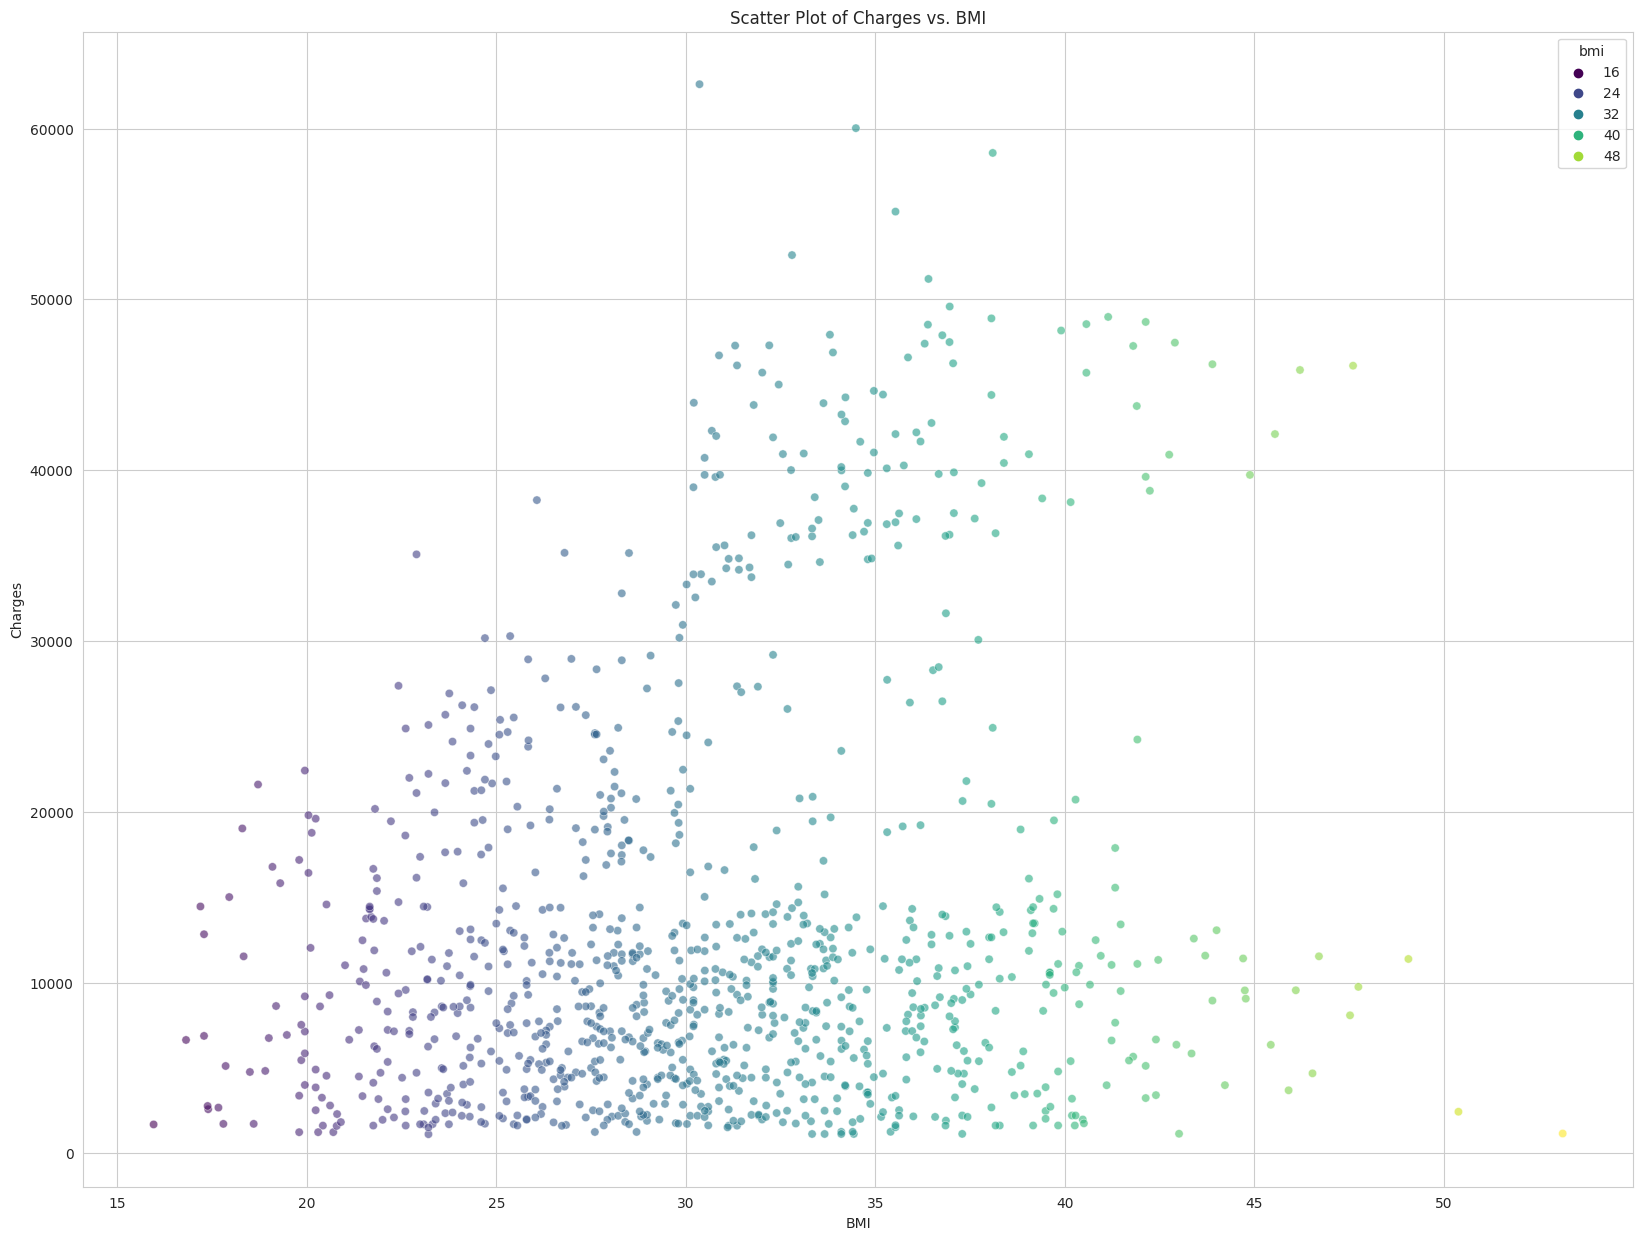

In [18]:
# Create the scatter plot
plt.figure(figsize=(20, 15))
sns.scatterplot(
    data=data,
    x="bmi",
    y="charges",
    hue="bmi",  # Color by bmi (continuous variable)
    palette="viridis",  # Use a continuous color palette
    alpha=0.6  # Slight transparency for overlapping points
)

# Set labels and title
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("Scatter Plot of Charges vs. BMI")

# Show the plot
plt.show()

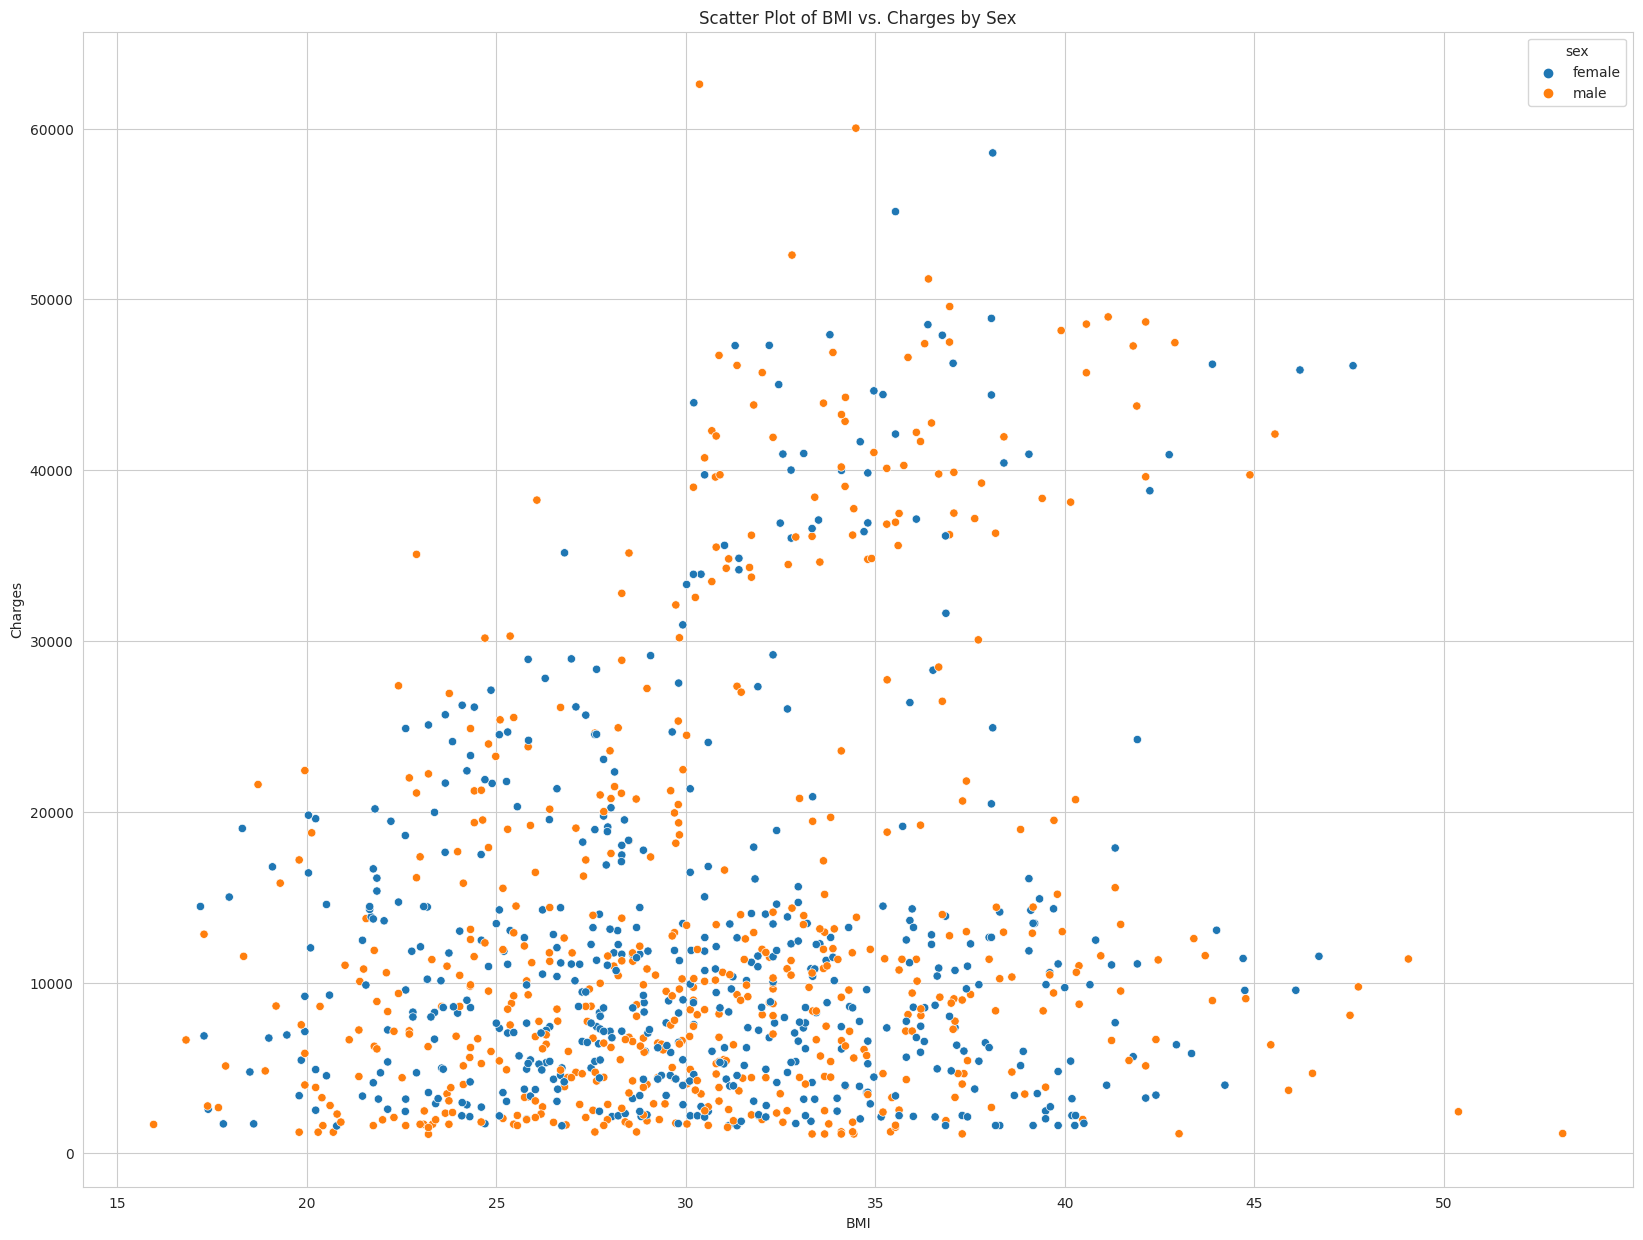

In [19]:
# Create the scatter plot using seaborn
plt.figure(figsize=(20, 15))  # Set the figure size
sns.scatterplot(x='bmi', y='charges', hue='sex', data=data)

# Set the title and labels
plt.title('Scatter Plot of BMI vs. Charges by Sex')
plt.xlabel('BMI')
plt.ylabel('Charges')

# Show the plot
plt.show()

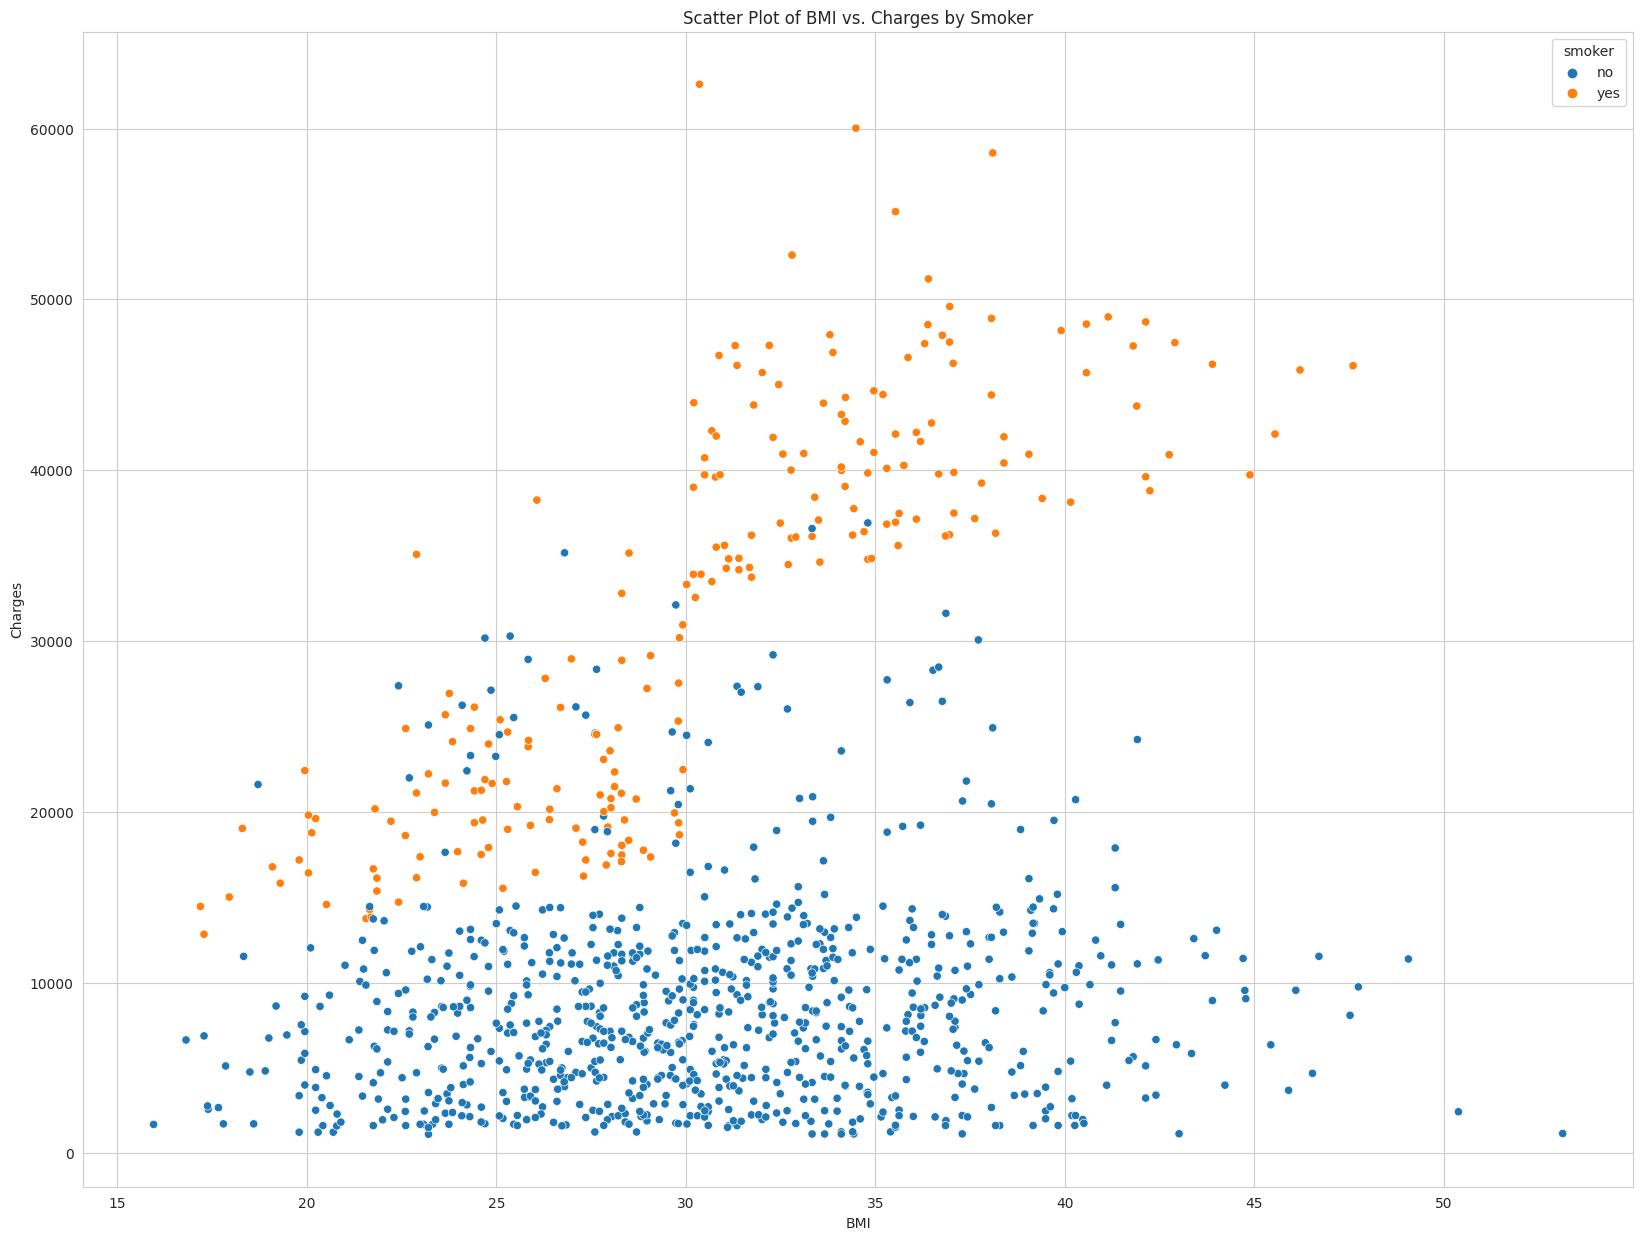

In [20]:
# Create the scatter plot using seaborn
plt.figure(figsize=(20, 15))  # Set the figure size
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=data)

# Set the title and labels
plt.title('Scatter Plot of BMI vs. Charges by Smoker')
plt.xlabel('BMI')
plt.ylabel('Charges')

# Show the plot
plt.show()

## Correlation Check

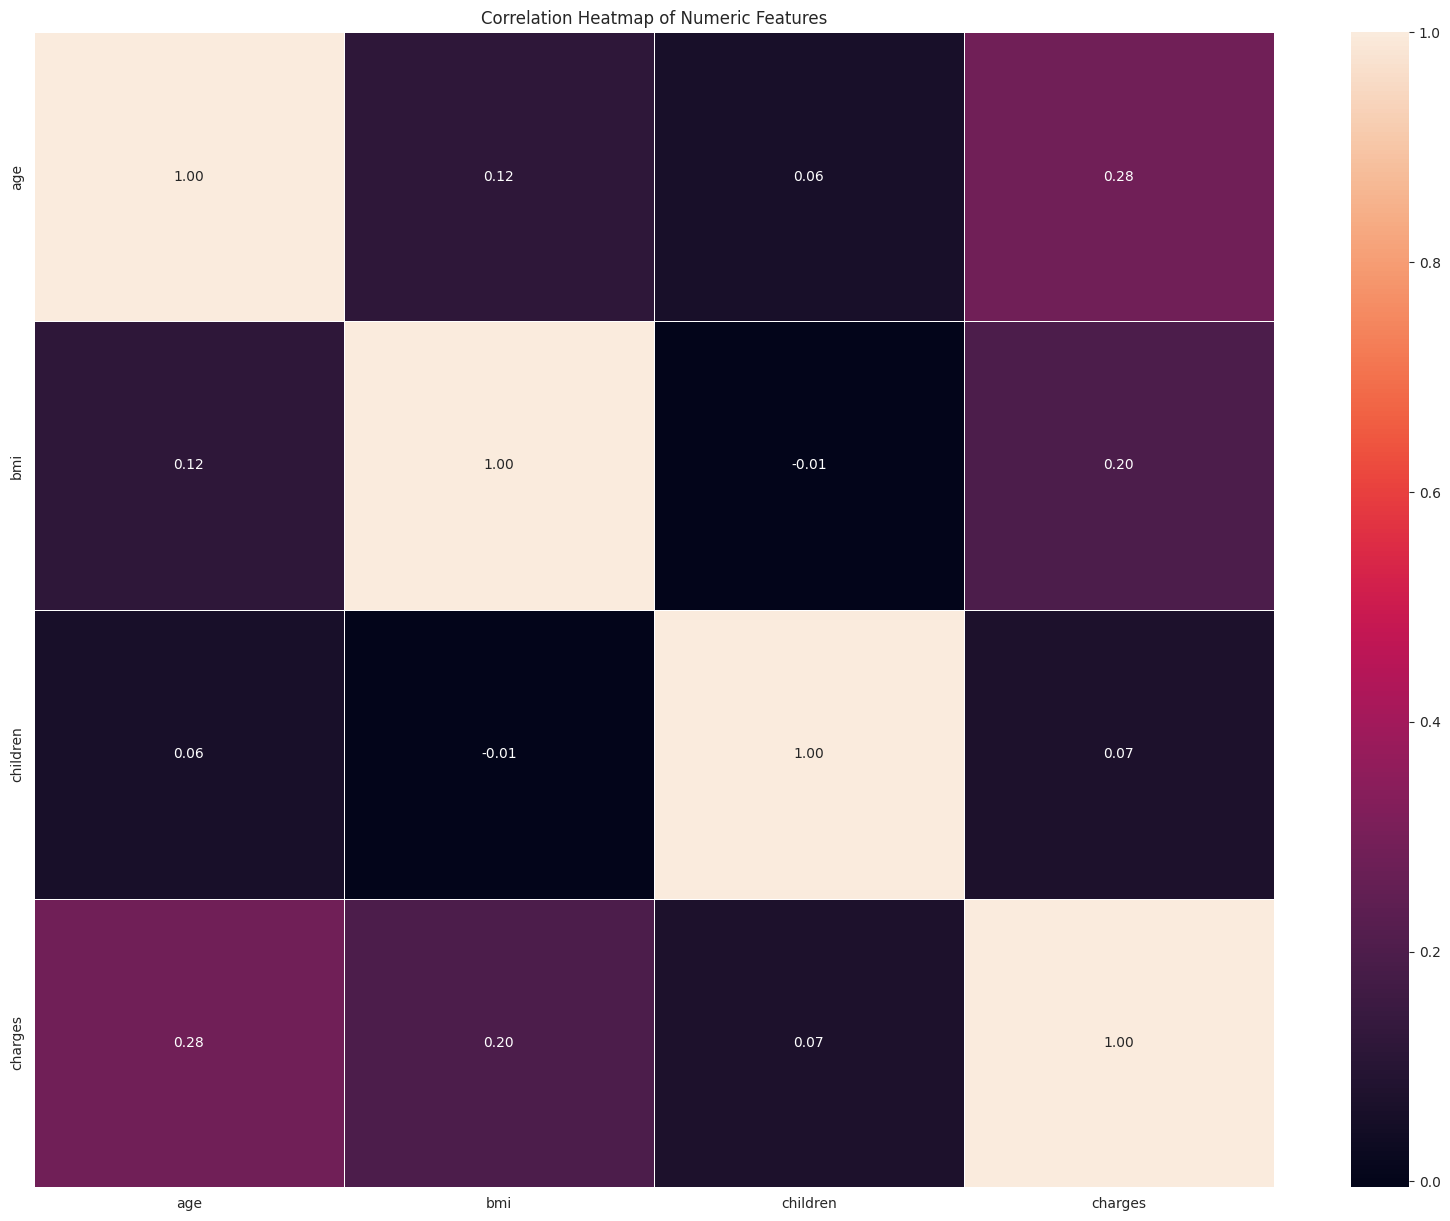

In [21]:
# Select only the numeric columns for correlation calculation
numeric_df = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create the heatmap
plt.figure(figsize=(20, 15))  # Adjust figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='rocket', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# Data Preprocessing

In [22]:
# Ordinal encoding for 'sex', 'smoker', and 'region'
ordinal_encoder = OrdinalEncoder()

# Correct column names to lowercase
x_train[['sex', 'smoker', 'region']] = ordinal_encoder.fit_transform(x_train[['sex', 'smoker', 'region']])
x_test[['sex', 'smoker', 'region']] = ordinal_encoder.transform(x_test[['sex', 'smoker', 'region']])

# Display the updated DataFrame info
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1070 entries, 560 to 1126
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1070 non-null   int64  
 1   sex       1070 non-null   float64
 2   bmi       1070 non-null   float64
 3   children  1070 non-null   int64  
 4   smoker    1070 non-null   float64
 5   region    1070 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 58.5 KB


In [23]:
x_train_noscale = x_train.copy()
x_test_noscale = x_test.copy()

## Normalization/ Scale data

In [24]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
x_train_std = scaler.fit_transform(x_train_noscale)
# Transform the test data using the fitted scaler
x_test_std = scaler.transform(x_test_noscale)

In [25]:
# Convert the scaled data back to DataFrames
x_train_std = pd.DataFrame(x_train_std, columns=x_train_noscale.columns)
x_test_std = pd.DataFrame(x_test_std, columns=x_test_noscale.columns)
x_train_std.describe()

,age,sex,bmi,children,smoker,region
count,1.070000e+03,1.070000e+03,1.070000e+03,1.070000e+03,1.070000e+03,1.070000e+03
mean,-2.033680e-16,-7.304645e-17,-4.980440e-17,5.644498e-17,9.960879e-18,-6.640586e-17
std,1.000468e+00,1.000468e+00,1.000468e+00,1.000468e+00,1.000468e+00,1.000468e+00
min,-1.518194e+00,-1.024602e+00,-2.417060e+00,-9.111921e-01,-5.087470e-01,-1.353256e+00
25%,-8.784157e-01,-1.024602e+00,-7.210253e-01,-9.111921e-01,-5.087470e-01,-4.561159e-01
50%,1.016470e-02,9.759891e-01,-5.800739e-02,-8.842793e-02,-5.087470e-01,4.410238e-01
75%,8.276587e-01,9.759891e-01,6.515707e-01,7.343363e-01,-5.087470e-01,4.410238e-01
max,1.751782e+00,9.759891e-01,3.736342e+00,3.202629e+00,1.965613e+00,1.338164e+00


## Dimensionality Reduction

In [26]:
# --- Apply PCA for dimensionality reduction ---
# 1. Initialize PCA with the desired number of components.  For example, to reduce to 2 dimensions
pca = PCA(n_components=2) # You can change n_components as needed

# 2. Fit PCA on the scaled training data and transform it.
x_train = pca.fit_transform(x_train_std)

# 3. Transform the scaled test data using the fitted PCA.
x_test = pca.transform(x_test_std)

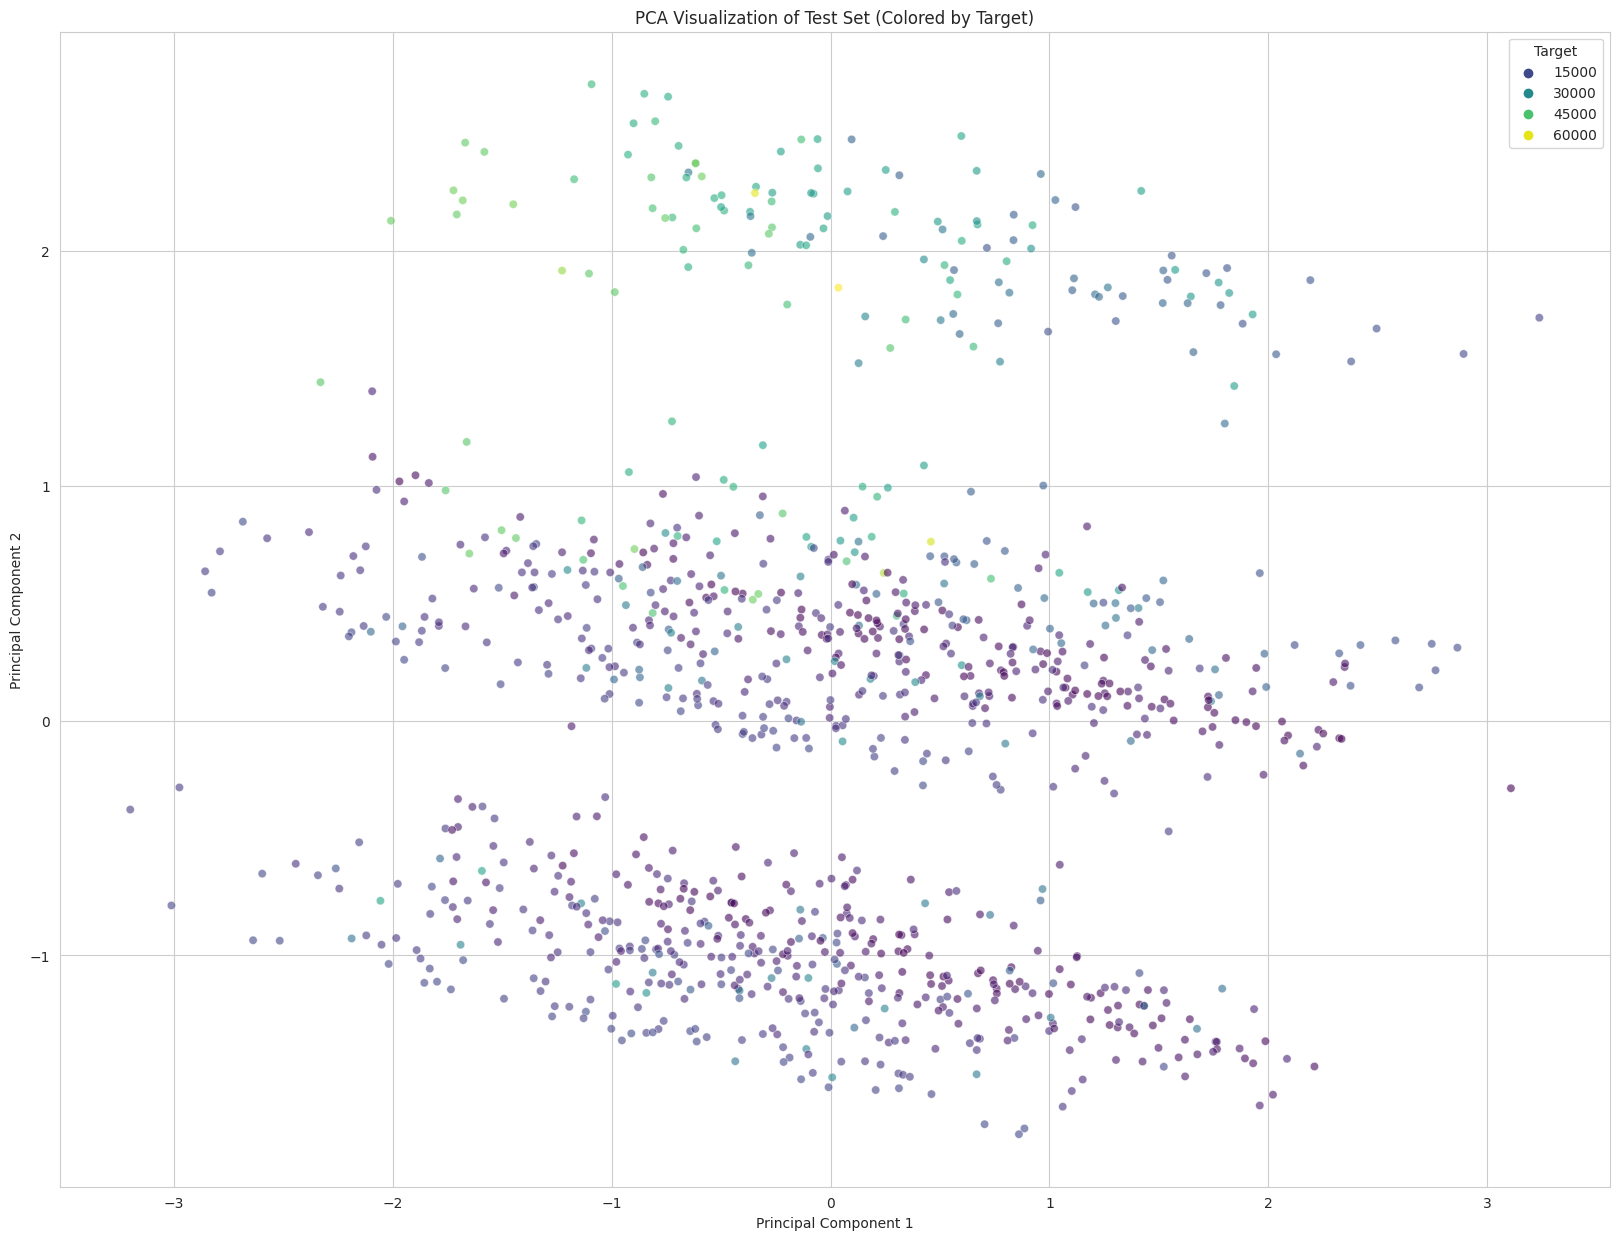

In [27]:
# --- Visualize the PCA-transformed data ---

# Create a DataFrame for the test set PCA components
plot_data = pd.DataFrame({
    'PC1': x_train[:, 0],  # First principal component
    'PC2': x_train[:, 1],  # Second principal component
    'Target': y_train         # Target variable for coloring
})

# Create the scatter plot
plt.figure(figsize=(20, 15))
sns.scatterplot(
    data=plot_data,
    x="PC1",
    y="PC2",
    hue="Target",  # Color by target variable (e.g., charges)
    palette="viridis",  # Continuous palette for charges
    alpha=0.6  # Slight transparency for overlapping points
)

# Set labels and title
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Test Set (Colored by Target)")

# Optionally add a regression line (if desired)
# sns.regplot(data=plot_data, x="PC1", y="PC2", scatter=False, color="blue")

# Show the plot
plt.show()

# Modeling and Experiments

## Train initial model

In [28]:
# Define models - using regressors
ml_models = [
    ("KNeighborsRegressor", KNeighborsRegressor()),
    ("RadiusNeighborsRegressor", RadiusNeighborsRegressor(radius=8.0)),  # Increased radius
]

# Perform cross-validation for each model
for model_name, model in ml_models:
    print(f"{model_name}:")
    
    # Perform cross-validation with R^2 scoring
    cv_r2_scores = cross_val_score(model, x_train, y_train, cv=10, scoring='r2')
    
    # Print cross-validation scores and their average
    print(f"\tK-Fold Cross-Validation R^2: {cv_r2_scores}")
    print(f"\tAverage K-Fold Cross-Validation R^2: {cv_r2_scores.mean():.3f} ± {cv_r2_scores.std():.3f}")
    print('-' * 100)

KNeighborsRegressor:
	K-Fold Cross-Validation R^2: [0.55989998 0.29628189 0.56300127 0.59043705 0.4372118  0.28098053
 0.28026915 0.48849137 0.39888273 0.22779675]
	Average K-Fold Cross-Validation R^2: 0.412 ± 0.128
----------------------------------------------------------------------------------------------------
RadiusNeighborsRegressor:
	K-Fold Cross-Validation R^2: [-1.40795303e-03 -8.15615256e-05 -1.43059283e-05 -4.33672629e-02
 -1.61145838e-03 -8.13339152e-03 -5.74352234e-04 -8.56668705e-04
 -7.85036545e-04 -9.75182719e-03]
	Average K-Fold Cross-Validation R^2: -0.007 ± 0.013
----------------------------------------------------------------------------------------------------


## Scatter Plot with a Regression Line (KNeighborsRegressor)

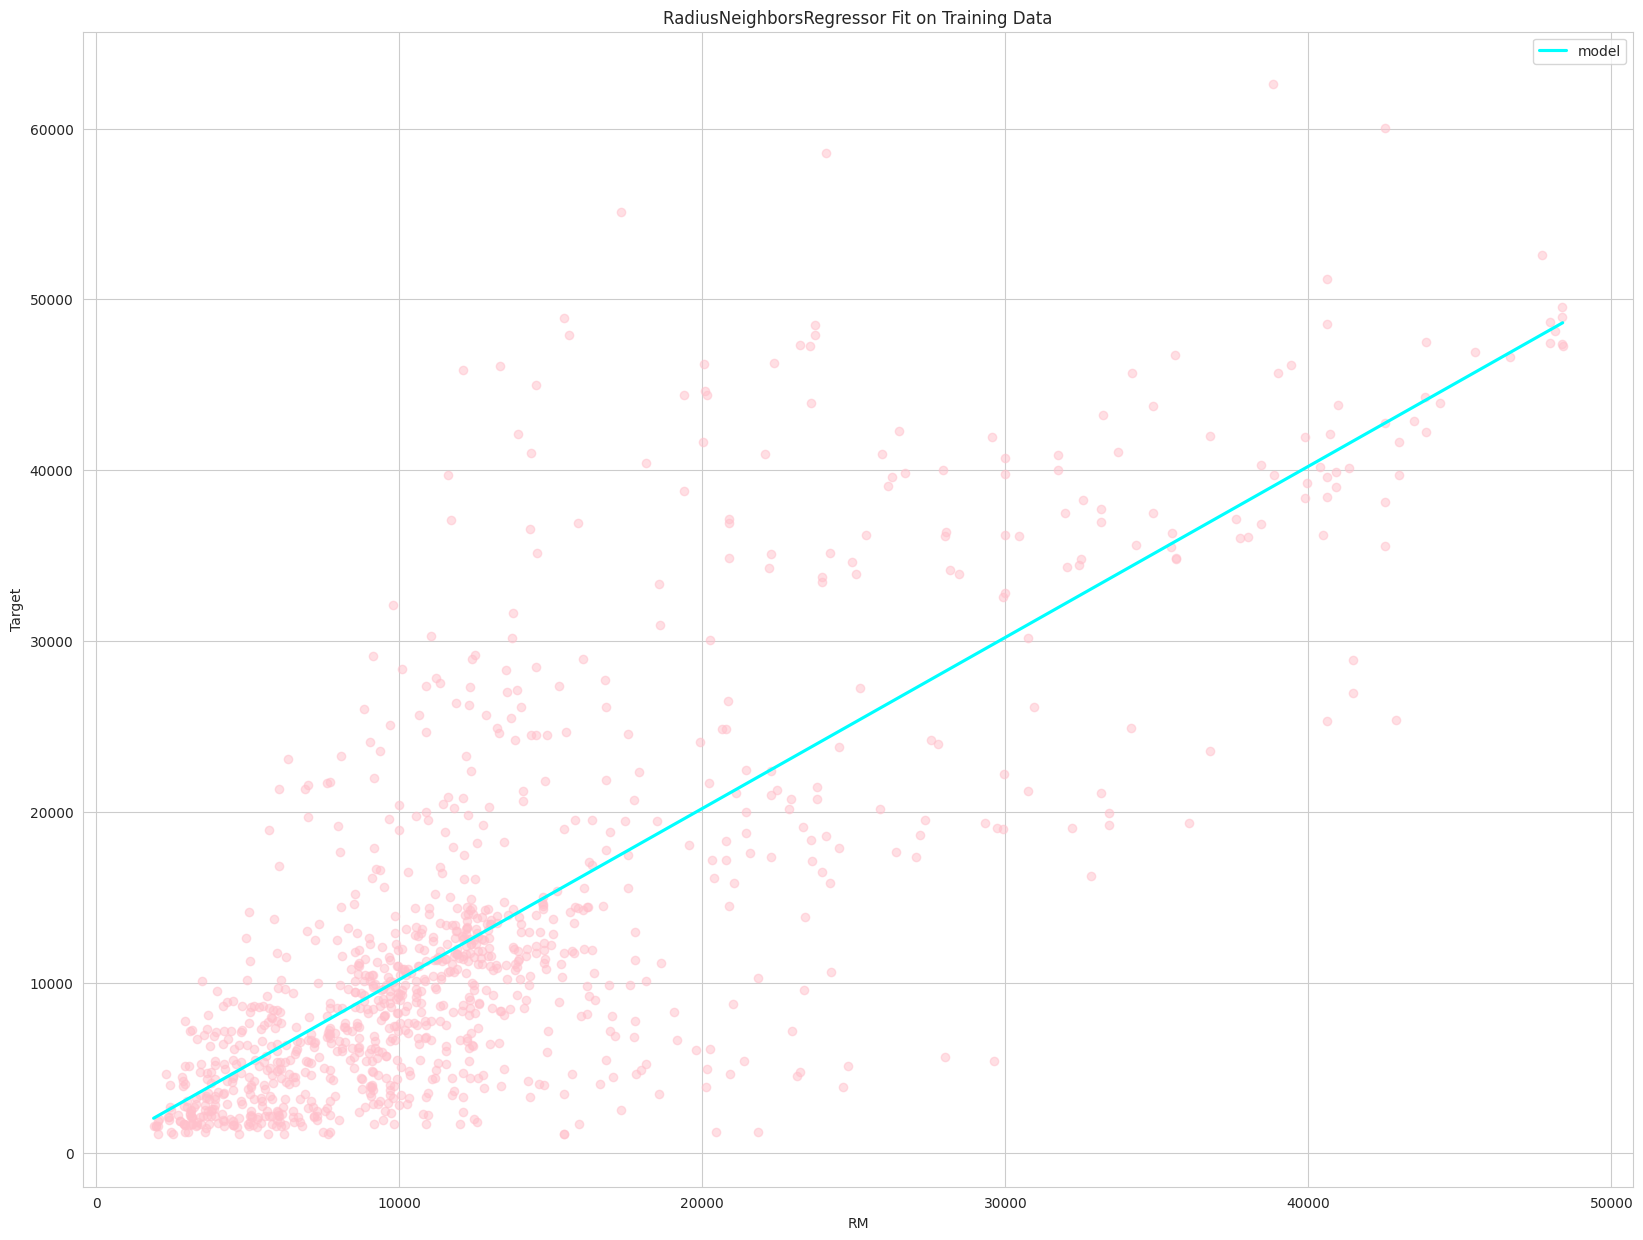

In [29]:
model = KNeighborsRegressor()
# Train the model and predict on training data
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Predicted': y_pred,
    'Target': y_train
})

# Create the scatter plot with regression line
plt.figure(figsize=(20, 15))
sns.regplot(
    data=plot_data,
    x="Predicted",
    y="Target",
    scatter_kws={'color': 'pink', 'alpha': 0.5, 'label': 'training data'},  # Pink points for training data
    line_kws={'color': 'cyan', 'label': 'model'},  # Cyan line for model fit
    ci=None  # Remove confidence interval for simplicity (optional)
)

# Set labels and title
plt.xlabel("RM")  # Assuming RM is a placeholder for the first PCA component
plt.ylabel("Target")
plt.title(f"{model_name} Fit on Training Data")
plt.legend()

# Show the plot
plt.show()

## Scatter Plot with a Regression Line (RadiusNeighborsRegressor)

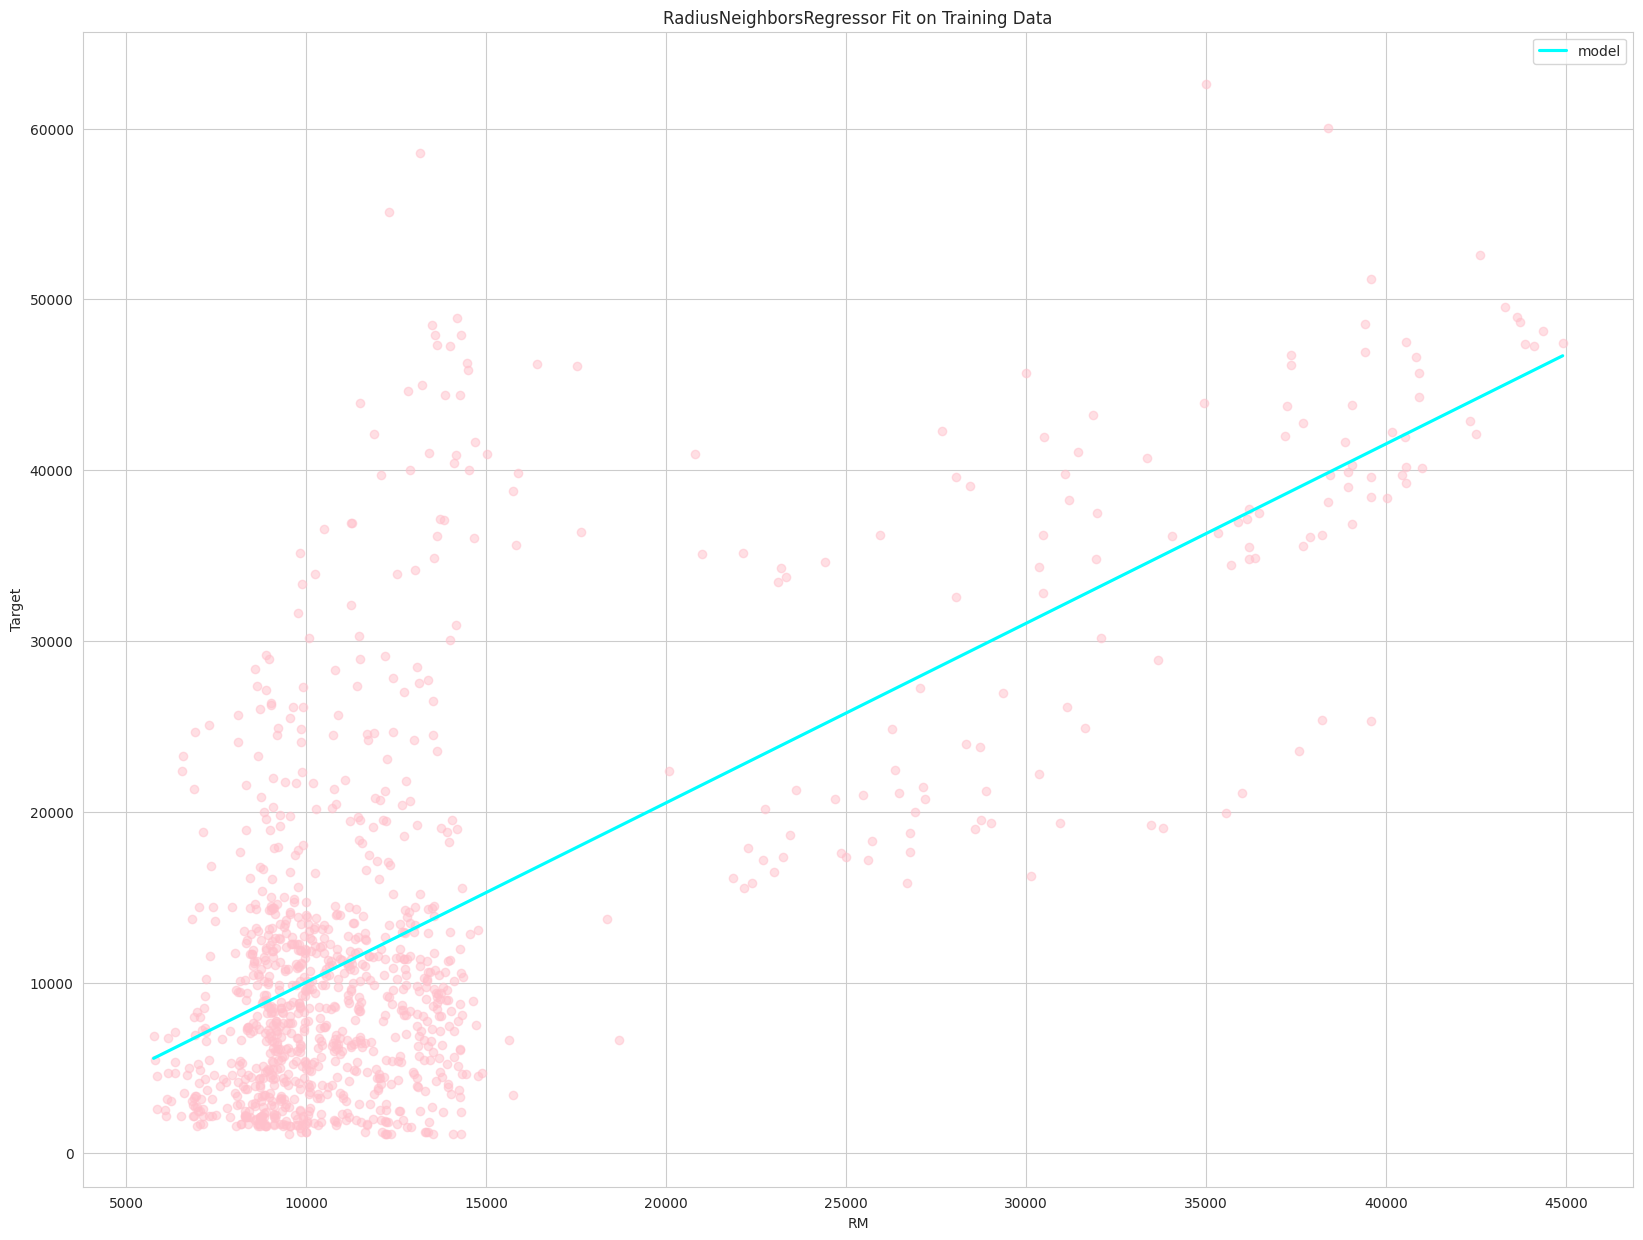

In [30]:
model = RadiusNeighborsRegressor()
# Train the model and predict on training data
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Predicted': y_pred,
    'Target': y_train
})

# Create the scatter plot with regression line
plt.figure(figsize=(20, 15))
sns.regplot(
    data=plot_data,
    x="Predicted",
    y="Target",
    scatter_kws={'color': 'pink', 'alpha': 0.5, 'label': 'training data'},  # Pink points for training data
    line_kws={'color': 'cyan', 'label': 'model'},  # Cyan line for model fit
    ci=None  # Remove confidence interval for simplicity (optional)
)

# Set labels and title
plt.xlabel("RM")  # Assuming RM is a placeholder for the first PCA component
plt.ylabel("Target")
plt.title(f"{model_name} Fit on Training Data")
plt.legend()

# Show the plot
plt.show()

## Hyperparameter Tuning

In [31]:
# Define the objective function for KNeighborsRegressor
def objective_knn(trial):
    # Define hyperparameter search space
    params = {
        'n_neighbors': trial.suggest_int('n_neighbors', 1, 20),
        'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),
        'algorithm': trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute']),
        'leaf_size': trial.suggest_int('leaf_size', 10, 50),
        'p': trial.suggest_int('p', 1, 2),
        'metric': trial.suggest_categorical('metric', ['minkowski', 'euclidean', 'manhattan'])
    }
    
    # Initialize the model with the suggested parameters
    model = KNeighborsRegressor(**params)
    
    # Perform cross-validation
    cv_r2_scores = cross_val_score(model, x_train, y_train, cv=10, scoring='r2')
    
    # Return the mean R^2 score (to maximize)
    return cv_r2_scores.mean()

# Define the objective function for RadiusNeighborsRegressor
def objective_rnn(trial):
    # Define hyperparameter search space
    params = {
        'radius': trial.suggest_float('radius', 1.0, 20.0),
        'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),
        'algorithm': trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute']),
        'leaf_size': trial.suggest_int('leaf_size', 10, 50),
        'p': trial.suggest_int('p', 1, 2),
        'metric': trial.suggest_categorical('metric', ['minkowski', 'euclidean', 'manhattan'])
    }
    
    # Initialize the model with the suggested parameters
    model = RadiusNeighborsRegressor(**params)
    
    # Perform cross-validation
    cv_r2_scores = cross_val_score(model, x_train, y_train, cv=10, scoring='r2')
    
    # Return the mean R^2 score (to maximize)
    return cv_r2_scores.mean()

# Create and run the optimization studies
print("Optimizing KNeighborsRegressor...")
study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(objective_knn, n_trials=50)

print("Optimizing RadiusNeighborsRegressor...")
study_rnn = optuna.create_study(direction='maximize')
study_rnn.optimize(objective_rnn, n_trials=50)

# Print the best hyperparameters and scores
print("Best parameters and R^2 score for KNeighborsRegressor:")
print(f"\tBest parameters: {study_knn.best_params}")
print(f"\tBest R^2: {study_knn.best_value:.3f}")
print('-' * 100)

print("Best parameters and R^2 score for RadiusNeighborsRegressor:")
print(f"\tBest parameters: {study_rnn.best_params}")
print(f"\tBest R^2: {study_rnn.best_value:.3f}")
print('-' * 100)

# Train and evaluate the best models
best_knn = KNeighborsRegressor(**study_knn.best_params)
best_rnn = RadiusNeighborsRegressor(**study_rnn.best_params)

best_knn.fit(x_train, y_train)
best_rnn.fit(x_train, y_train)

cv_r2_scores_knn = cross_val_score(best_knn, x_train, y_train, cv=10, scoring='r2')
cv_r2_scores_rnn = cross_val_score(best_rnn, x_train, y_train, cv=10, scoring='r2')

print("Final evaluation with best KNeighborsRegressor:")
print(f"\tK-Fold Cross-Validation R^2: {cv_r2_scores_knn}")
print(f"\tAverage K-Fold Cross-Validation R^2: {cv_r2_scores_knn.mean():.3f} ± {cv_r2_scores_knn.std():.3f}")
print('-' * 100)

print("Final evaluation with best RadiusNeighborsRegressor:")
print(f"\tK-Fold Cross-Validation R^2: {cv_r2_scores_rnn}")
print(f"\tAverage K-Fold Cross-Validation R^2: {cv_r2_scores_rnn.mean():.3f} ± {cv_r2_scores_rnn.std():.3f}")
print('-' * 100)

[I 2025-07-21 10:57:52,801] A new study created in memory with name: no-name-992620ac-1c47-4b4e-a8b3-62e01c0a9efc
[I 2025-07-21 10:57:52,829] Trial 0 finished with value: 0.3886220009073663 and parameters: {'n_neighbors': 4, 'weights': 'uniform', 'algorithm': 'ball_tree', 'leaf_size': 24, 'p': 1, 'metric': 'euclidean'}. Best is trial 0 with value: 0.3886220009073663.
[I 2025-07-21 10:57:52,860] Trial 1 finished with value: 0.5087264110050016 and parameters: {'n_neighbors': 20, 'weights': 'uniform', 'algorithm': 'ball_tree', 'leaf_size': 37, 'p': 1, 'metric': 'euclidean'}. Best is trial 1 with value: 0.5087264110050016.
[I 2025-07-21 10:57:52,927] Trial 2 finished with value: 0.508158407405656 and parameters: {'n_neighbors': 14, 'weights': 'uniform', 'algorithm': 'brute', 'leaf_size': 46, 'p': 1, 'metric': 'minkowski'}. Best is trial 1 with value: 0.5087264110050016.
[I 2025-07-21 10:57:52,957] Trial 3 finished with value: 0.45614816088232163 and parameters: {'n_neighbors': 11, 'weights

Optimizing KNeighborsRegressor...


[I 2025-07-21 10:57:53,014] Trial 5 finished with value: 0.32464093738490307 and parameters: {'n_neighbors': 3, 'weights': 'uniform', 'algorithm': 'ball_tree', 'leaf_size': 34, 'p': 1, 'metric': 'minkowski'}. Best is trial 1 with value: 0.5087264110050016.
[I 2025-07-21 10:57:53,039] Trial 6 finished with value: 0.42949662804520744 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 38, 'p': 1, 'metric': 'manhattan'}. Best is trial 1 with value: 0.5087264110050016.
[I 2025-07-21 10:57:53,068] Trial 7 finished with value: 0.4875686380574374 and parameters: {'n_neighbors': 10, 'weights': 'uniform', 'algorithm': 'brute', 'leaf_size': 49, 'p': 2, 'metric': 'manhattan'}. Best is trial 1 with value: 0.5087264110050016.
[I 2025-07-21 10:57:53,099] Trial 8 finished with value: 0.4723112191981733 and parameters: {'n_neighbors': 14, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 38, 'p': 1, 'metric': 'euclidean'}. Best is trial 1 with value: 0.5

Optimizing RadiusNeighborsRegressor...


[I 2025-07-21 10:57:55,111] Trial 2 finished with value: 0.30335032872029366 and parameters: {'radius': 3.959395256197655, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 32, 'p': 1, 'metric': 'manhattan'}. Best is trial 2 with value: 0.30335032872029366.
[I 2025-07-21 10:57:55,197] Trial 3 finished with value: 0.405088820883997 and parameters: {'radius': 2.562363714527947, 'weights': 'distance', 'algorithm': 'kd_tree', 'leaf_size': 50, 'p': 1, 'metric': 'manhattan'}. Best is trial 3 with value: 0.405088820883997.
[I 2025-07-21 10:57:55,276] Trial 4 finished with value: 0.25143453213203043 and parameters: {'radius': 5.7767352455737315, 'weights': 'distance', 'algorithm': 'kd_tree', 'leaf_size': 11, 'p': 2, 'metric': 'euclidean'}. Best is trial 3 with value: 0.405088820883997.
[I 2025-07-21 10:57:55,328] Trial 5 finished with value: -0.006658381800211788 and parameters: {'radius': 15.840100313430927, 'weights': 'uniform', 'algorithm': 'ball_tree', 'leaf_size': 18, 'p': 1, 'met

Best parameters and R^2 score for KNeighborsRegressor:
	Best parameters: {'n_neighbors': 15, 'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 14, 'p': 2, 'metric': 'minkowski'}
	Best R^2: 0.510
----------------------------------------------------------------------------------------------------
Best parameters and R^2 score for RadiusNeighborsRegressor:
	Best parameters: {'radius': 1.0262798716510249, 'weights': 'distance', 'algorithm': 'kd_tree', 'leaf_size': 27, 'p': 1, 'metric': 'manhattan'}
	Best R^2: 0.478
----------------------------------------------------------------------------------------------------
Final evaluation with best KNeighborsRegressor:
	K-Fold Cross-Validation R^2: [0.65193351 0.45285443 0.64180669 0.62325559 0.53520092 0.36151531
 0.40854873 0.58221744 0.45223038 0.39242318]
	Average K-Fold Cross-Validation R^2: 0.510 ± 0.104
----------------------------------------------------------------------------------------------------
Final evaluation with best Radiu

## Scatter Plot with a Regression Line (KNeighborsRegressor between "uniform" and "distance")

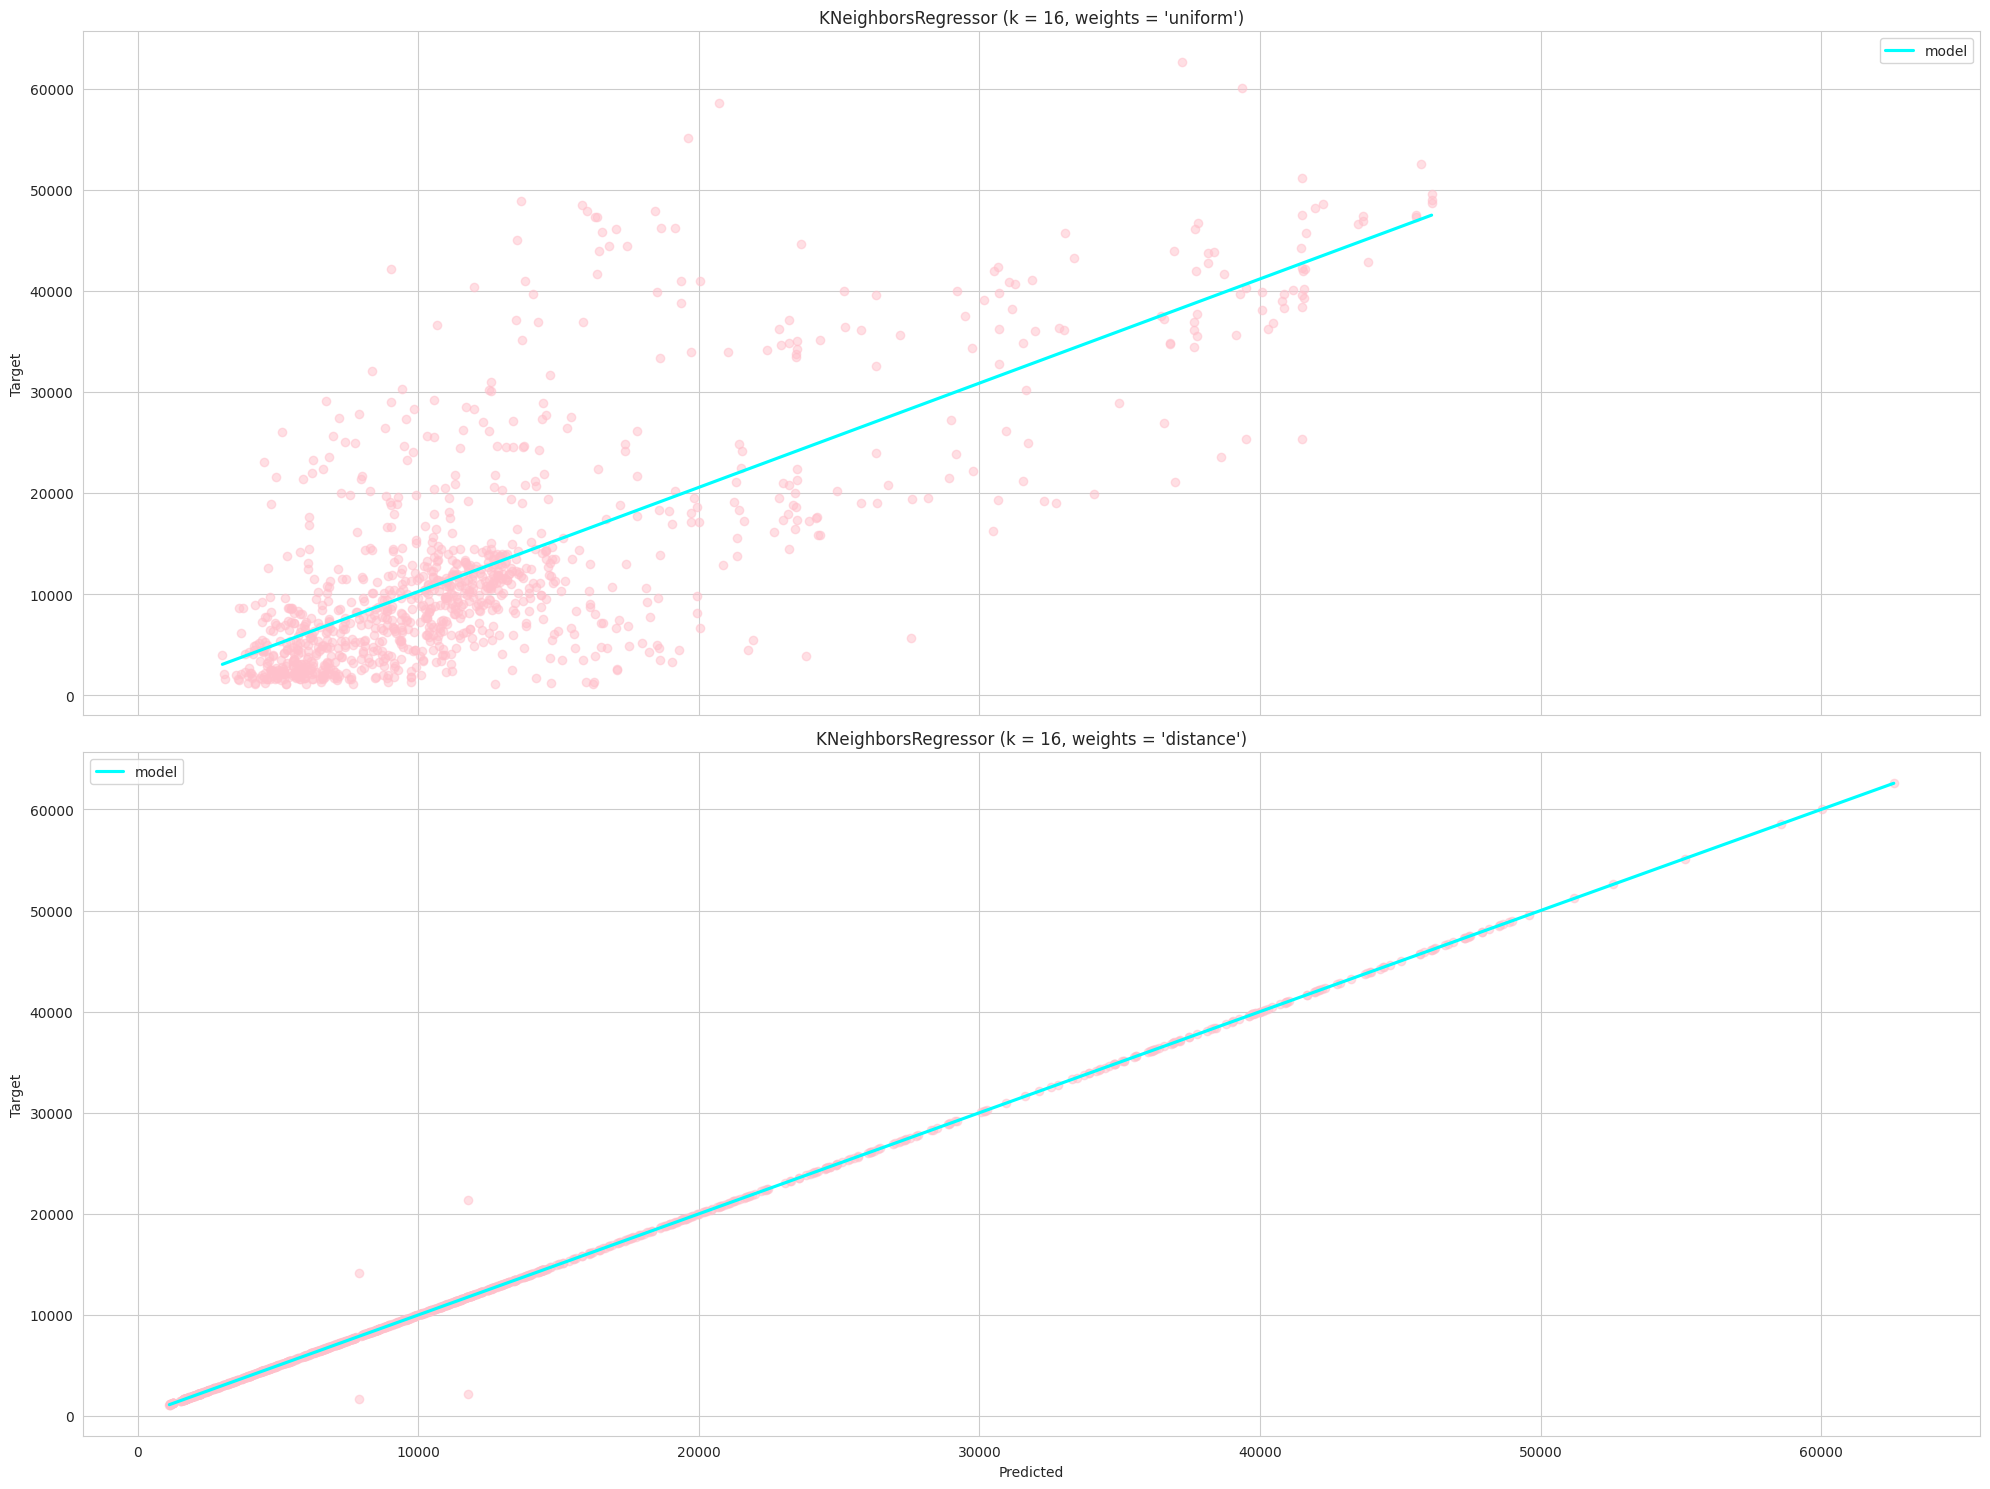

In [32]:
# Set n_neighbors
n_neighbors = 16

# Create subplots (2 rows, 1 column)
fig, axes = plt.subplots(2, 1, figsize=(20, 15), sharex=True, sharey=True)

# Loop over weights ("uniform" and "distance")
for i, weights in enumerate(["uniform", "distance"]):
    # Initialize and train the KNeighborsRegressor
    knn = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights)
    knn.fit(x_train, y_train)
    
    # Predict on test data (or X_train for training fit)
    y_pred = knn.predict(x_train)  # Use X_test and compare with y_test
    
    # Create a DataFrame for plotting
    plot_data = pd.DataFrame({
        'Predicted': y_pred,
        'Target': y_train
    })
    
    # Select the subplot
    plt.sca(axes[i])
    
    # Create scatter plot with regression line using sns.regplot
    sns.regplot(
        data=plot_data,
        x="Predicted",
        y="Target",
        scatter_kws={'color': 'pink', 'alpha': 0.5, 'label': 'test data'},  # Pink points for data
        line_kws={'color': 'cyan', 'label': 'model'},  # Cyan line for model fit
        ci=None  # Remove confidence interval for simplicity
    )
    
    # Set labels and title
    plt.xlabel("Predicted" if i == 1 else "")  # Only label x-axis on the bottom subplot
    plt.ylabel("Target")
    plt.title(f"KNeighborsRegressor (k = {n_neighbors}, weights = '{weights}')")
    plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Scatter Plot with a Regression Line (RadiusNeighborsRegressor between "uniform" and "distance")

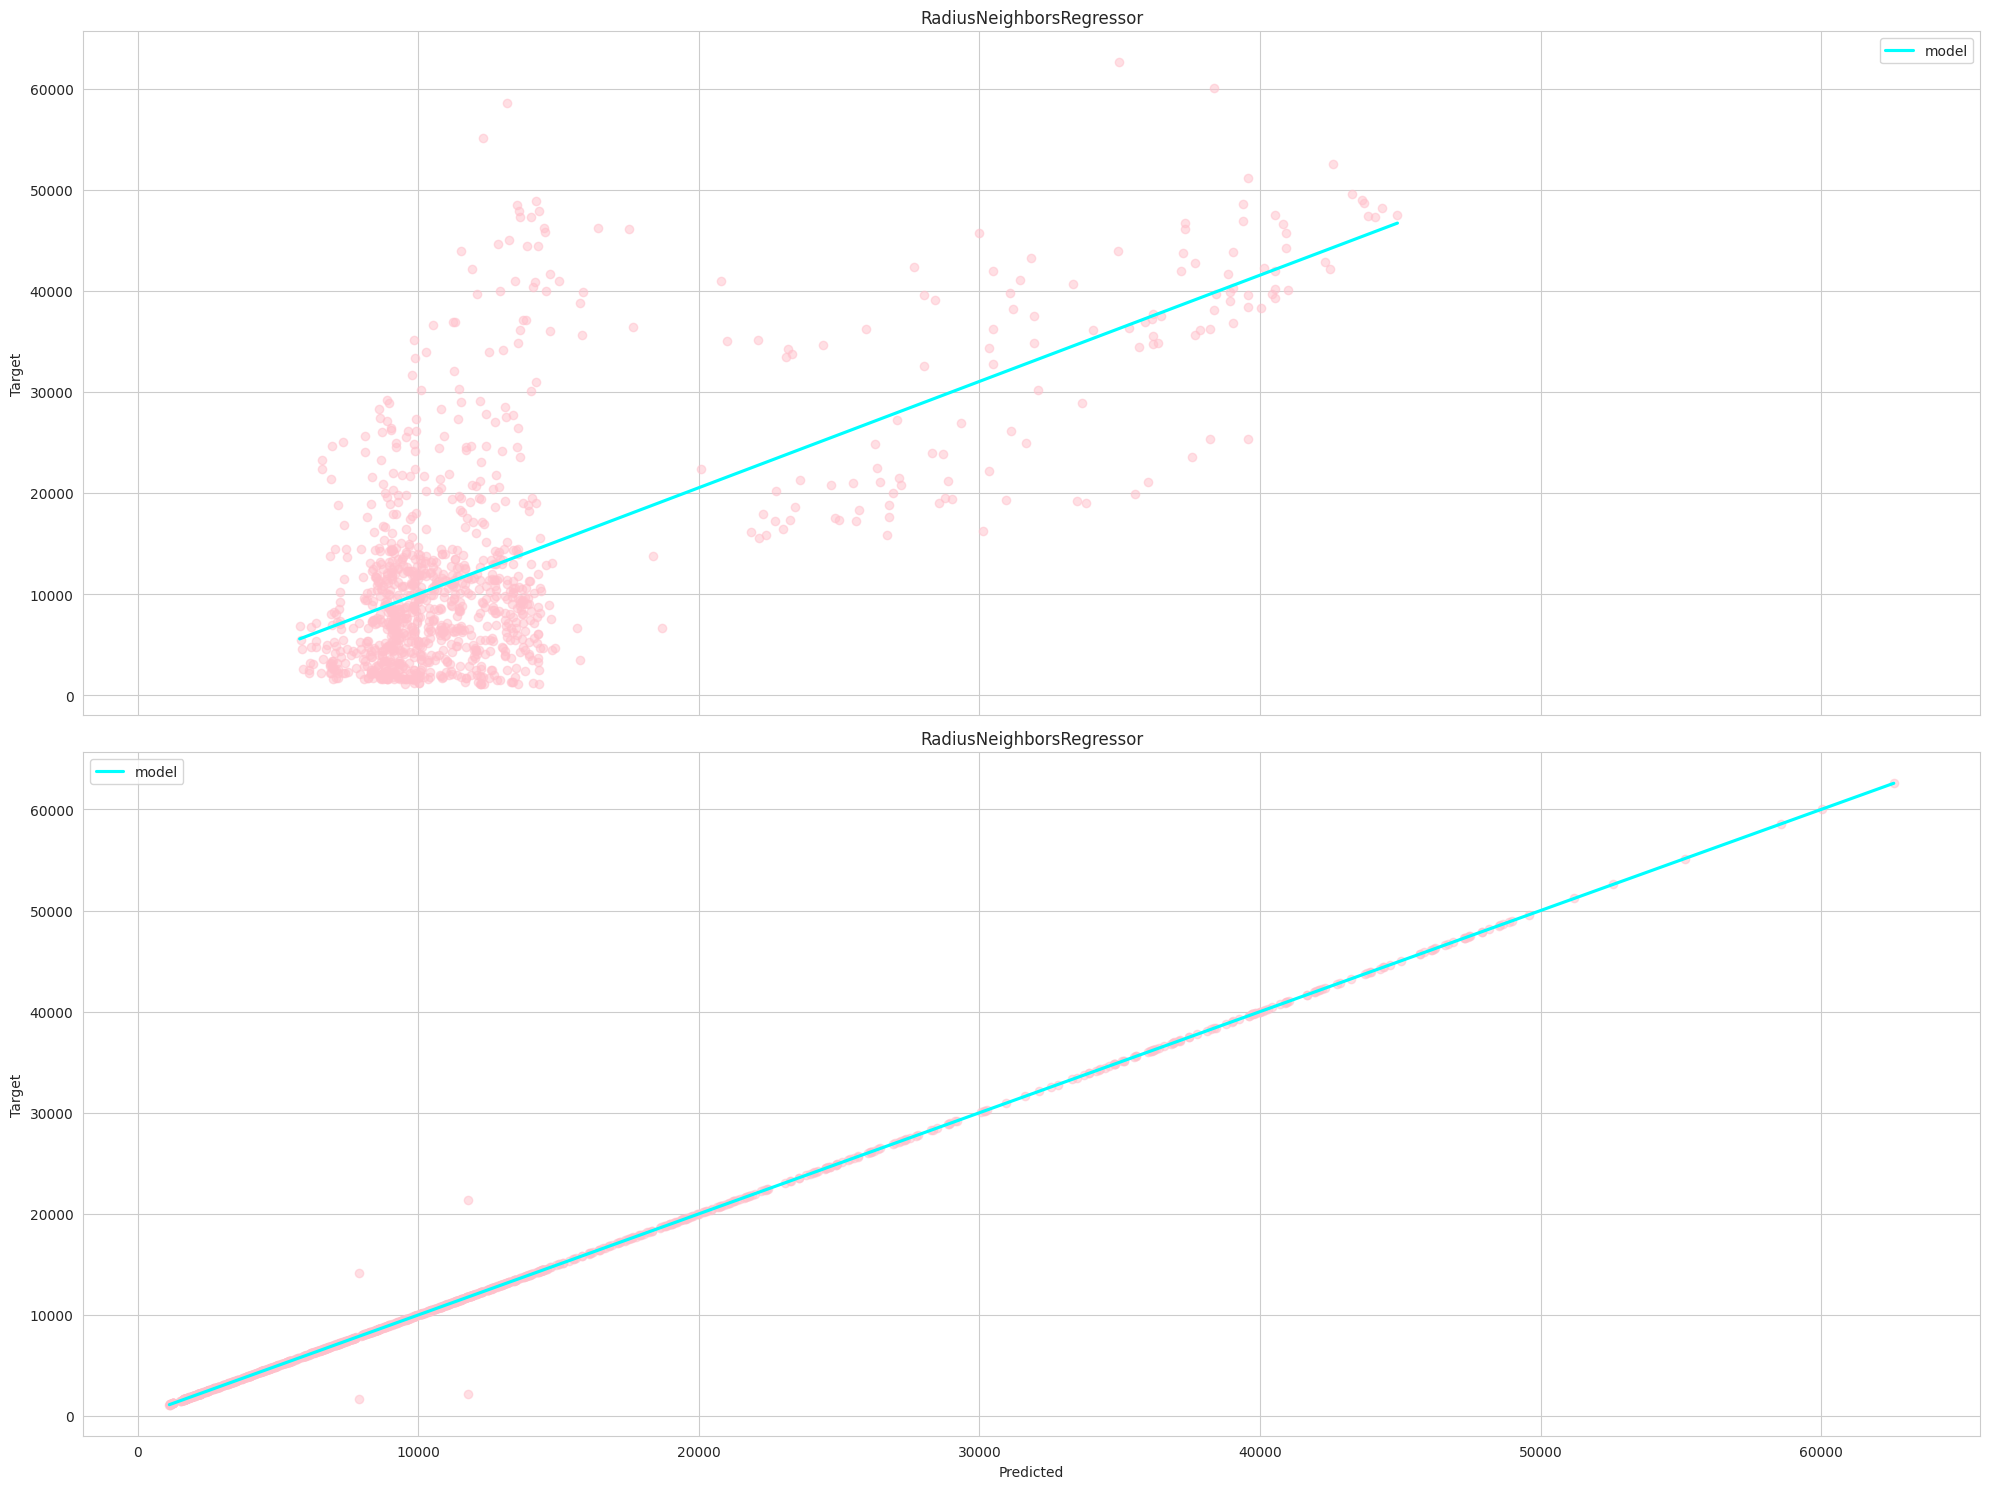

In [33]:
# Set n_neighbors
radius = 1

# Create subplots (2 rows, 1 column)
fig, axes = plt.subplots(2, 1, figsize=(20, 15), sharex=True, sharey=True)

# Loop over weights ("uniform" and "distance")
for i, weights in enumerate(["uniform", "distance"]):
    # Initialize and train the KNeighborsRegressor
    rnn = RadiusNeighborsRegressor(radius=radius, weights=weights)
    rnn.fit(x_train, y_train)
    
    # Predict on test data (or X_train for training fit)
    y_pred = rnn.predict(x_train)  # Use X_test and compare with y_test
    
    # Create a DataFrame for plotting
    plot_data = pd.DataFrame({
        'Predicted': y_pred,
        'Target': y_train
    })
    
    # Select the subplot
    plt.sca(axes[i])
    
    # Create scatter plot with regression line using sns.regplot
    sns.regplot(
        data=plot_data,
        x="Predicted",
        y="Target",
        scatter_kws={'color': 'pink', 'alpha': 0.5, 'label': 'test data'},  # Pink points for data
        line_kws={'color': 'cyan', 'label': 'model'},  # Cyan line for model fit
        ci=None  # Remove confidence interval for simplicity
    )
    
    # Set labels and title
    plt.xlabel("Predicted" if i == 1 else "")  # Only label x-axis on the bottom subplot
    plt.ylabel("Target")
    plt.title(f"RadiusNeighborsRegressor")
    plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Scatter Plot with a Regression Line (KNeighborsRegressor with best hyperparameters)

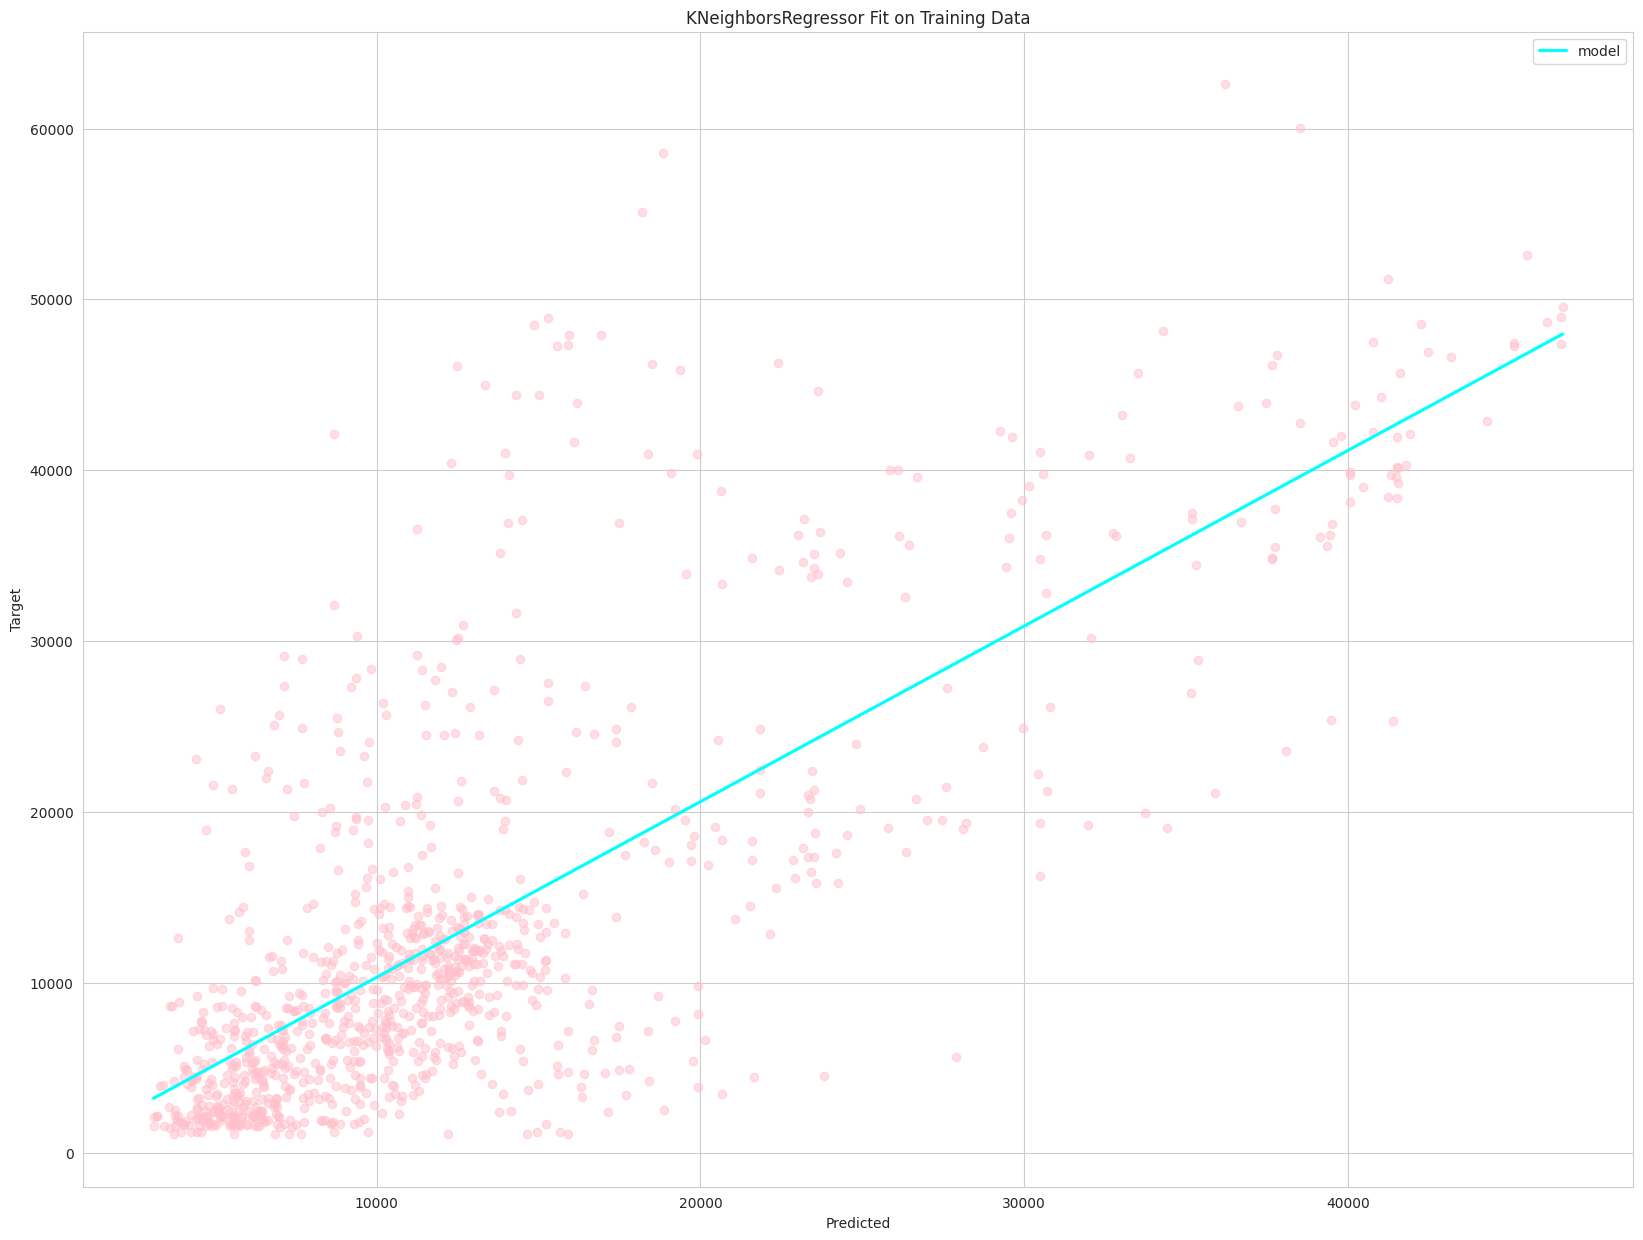

In [34]:
# Define the model with corrected parameters (replacing radius with n_neighbors)
model = KNeighborsRegressor(
    n_neighbors=16,  # Replaced radius=11.4 with a reasonable n_neighbors value
    weights='uniform',
    algorithm='kd_tree',
    leaf_size=14,
    p=1,
    metric='manhattan'
)

# Train the model and predict on training data
model.fit(x_train, y_train)
y_pred = model.predict(x_train)

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Predicted': y_pred,
    'Target': y_train
})

# Create the scatter plot with regression line
plt.figure(figsize=(20, 15))  # Adjusted to a more reasonable size (20, 15 was too large)
sns.regplot(
    data=plot_data,
    x="Predicted",
    y="Target",
    scatter_kws={'color': 'pink', 'alpha': 0.5, 'label': 'training data'},  # Pink points for training data
    line_kws={'color': 'cyan', 'label': 'model'},  # Cyan line for model fit
    ci=None  # Remove confidence interval for simplicity
)

# Set labels and title
plt.xlabel("Predicted")  # Changed from "RM" to "Predicted" to match the context
plt.ylabel("Target")
plt.title("KNeighborsRegressor Fit on Training Data")  # Updated model name
plt.legend()

# Show the plot
plt.show()

## Scatter Plot with a Regression Line (RadiusNeighborsRegressor with best hyperparameters)

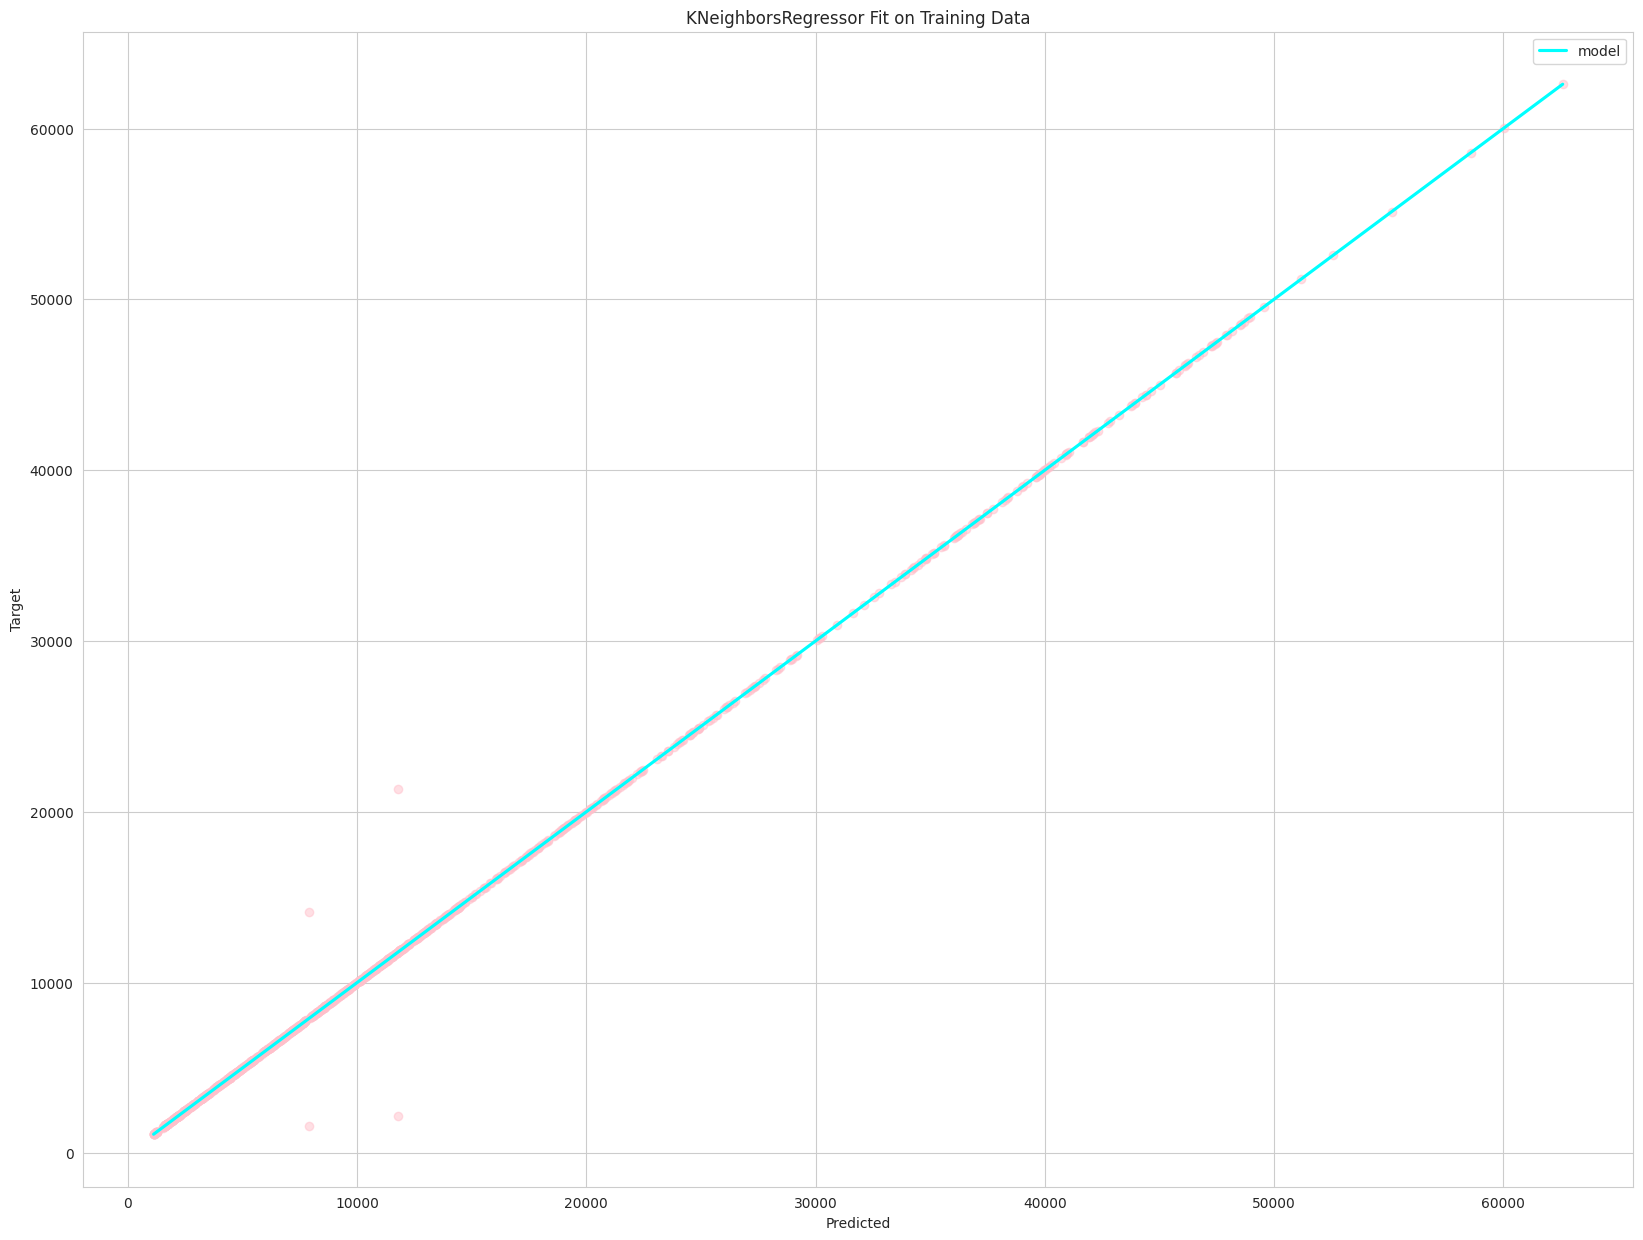

In [35]:
# Define the model with corrected parameters (replacing radius with n_neighbors)
model = RadiusNeighborsRegressor(
            radius=1.0060819405789985,
            weights='distance',
            algorithm='brute',
            leaf_size=44,
            p=2,
            metric='manhattan'
)

# Train the model and predict on training data
model.fit(x_train, y_train)
y_pred = model.predict(x_train)

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Predicted': y_pred,
    'Target': y_train
})

# Create the scatter plot with regression line
plt.figure(figsize=(20, 15))  # Adjusted to a more reasonable size (20, 15 was too large)
sns.regplot(
    data=plot_data,
    x="Predicted",
    y="Target",
    scatter_kws={'color': 'pink', 'alpha': 0.5, 'label': 'training data'},  # Pink points for training data
    line_kws={'color': 'cyan', 'label': 'model'},  # Cyan line for model fit
    ci=None  # Remove confidence interval for simplicity
)

# Set labels and title
plt.xlabel("Predicted")  # Changed from "RM" to "Predicted" to match the context
plt.ylabel("Target")
plt.title("KNeighborsRegressor Fit on Training Data")  # Updated model name
plt.legend()

# Show the plot
plt.show()

# Model Evaluation and Visualize the result

Training Set Metrics:
R² Score: 0.9983
Mean Absolute Error (MAE): 29.5725
Mean Squared Error (MSE): 244239.5544
Root Mean Squared Error (RMSE): 494.2060

Test Set Metrics:
R² Score: 0.4270
Mean Absolute Error (MAE): 6447.9600
Mean Squared Error (MSE): 88964031.5488
Root Mean Squared Error (RMSE): 9432.0746



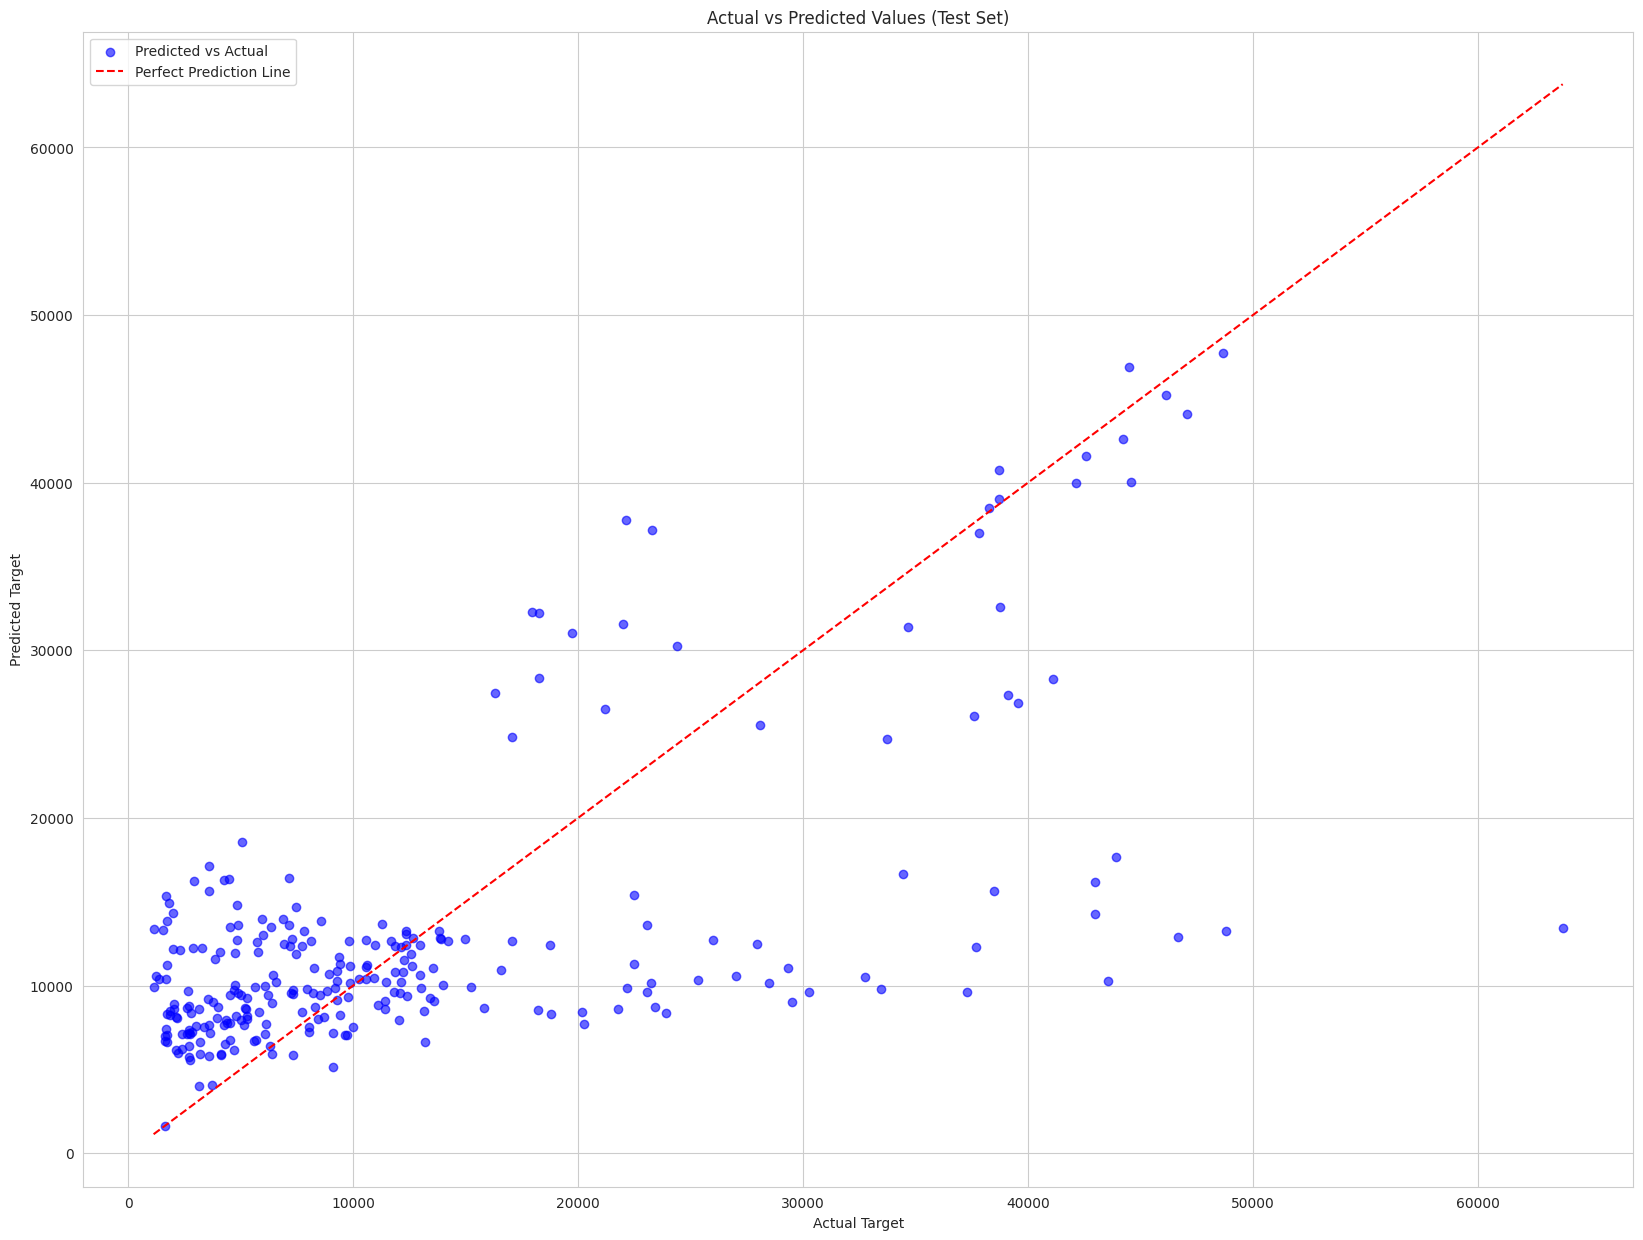

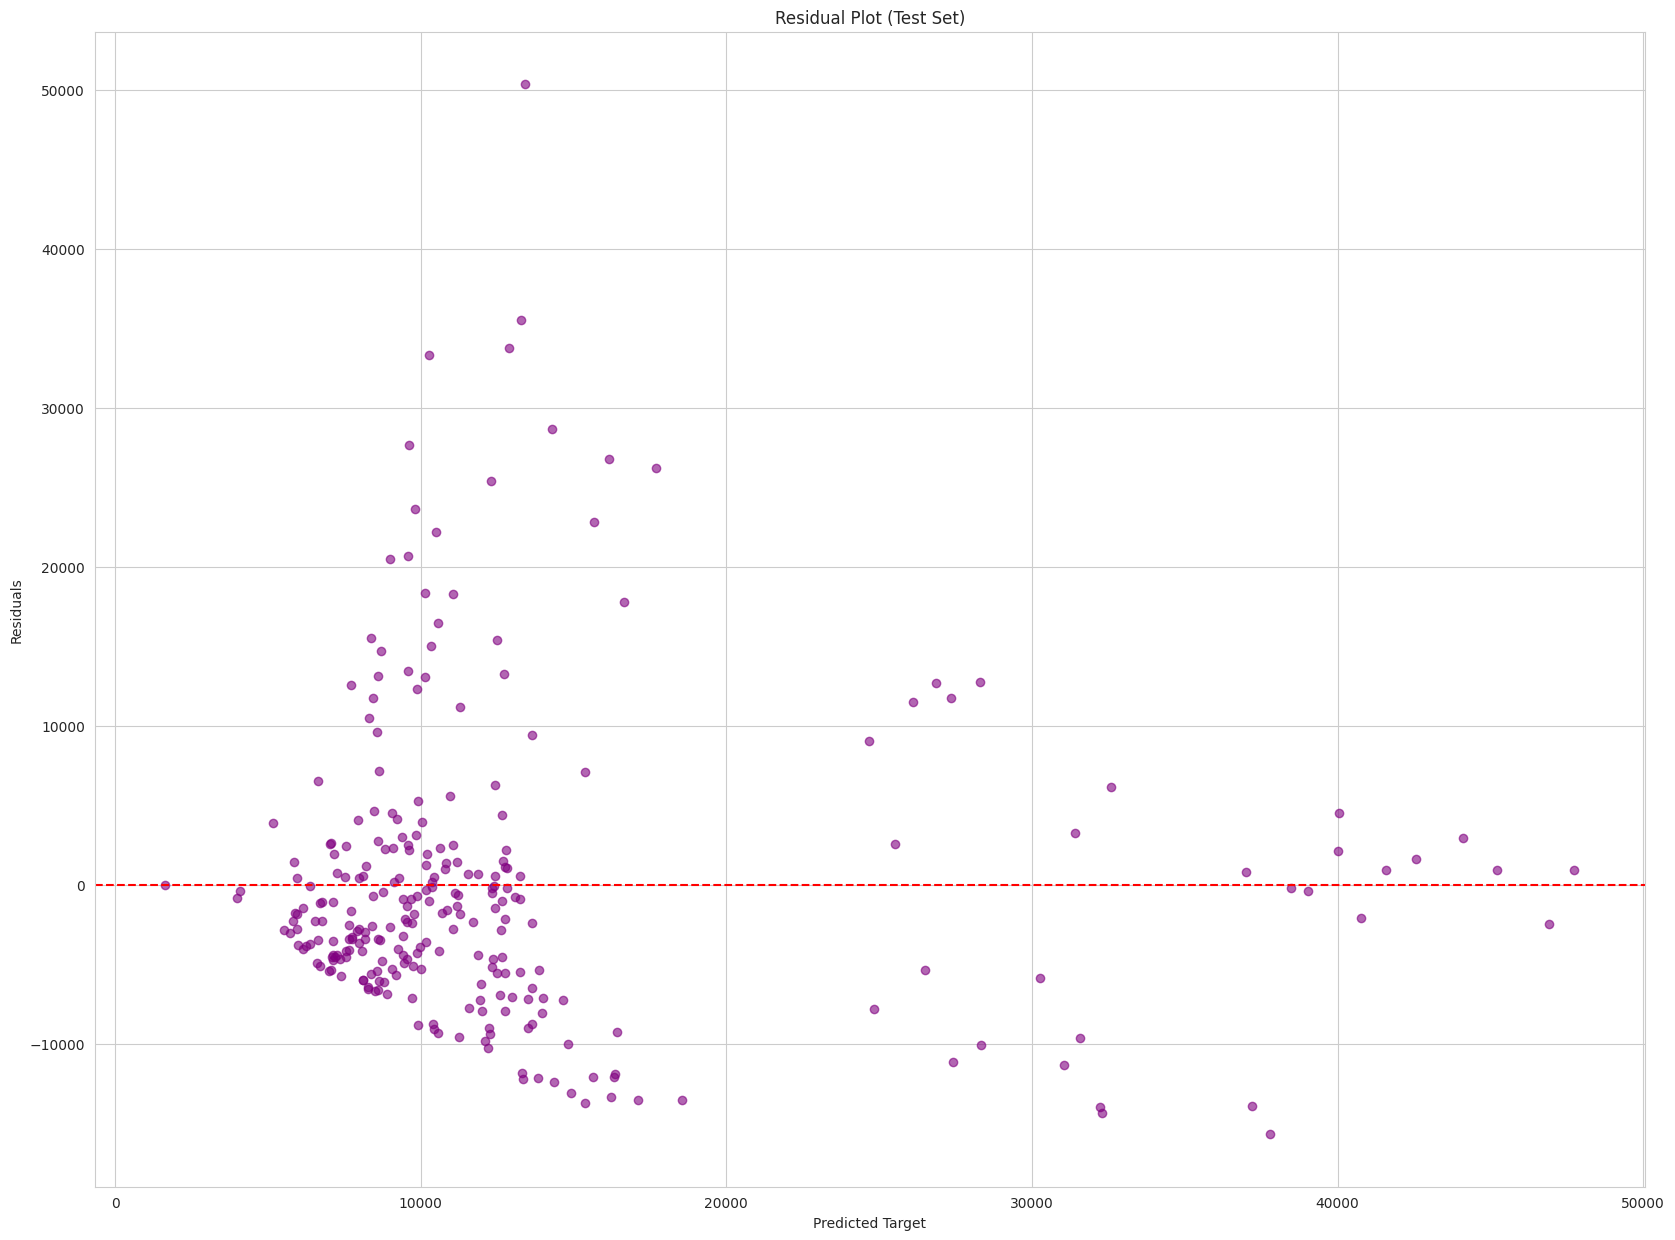

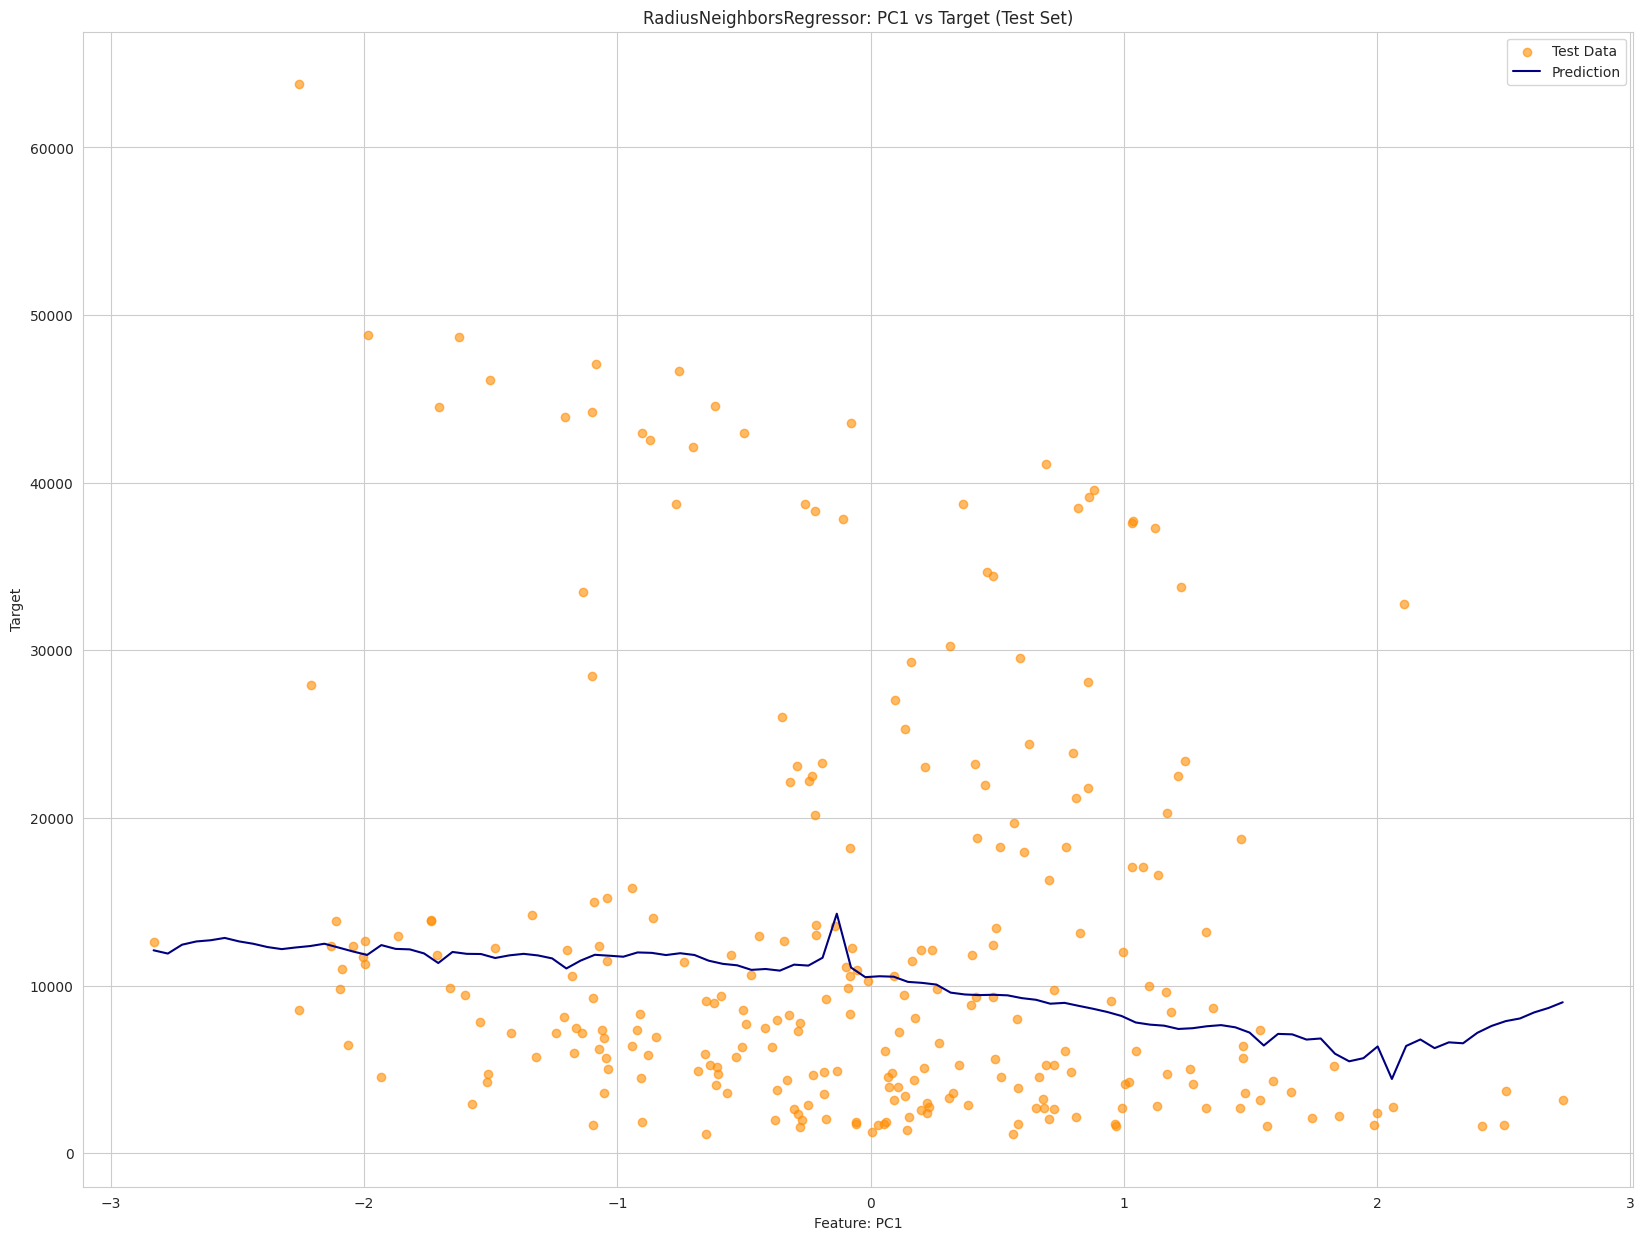

In [36]:
# Convert PCA-transformed data to DataFrames with named columns
x_train = pd.DataFrame(x_train, columns=['PC1', 'PC2'])
x_test = pd.DataFrame(x_test, columns=['PC1', 'PC2'])

# Convert y_train and y_test to Series if needed
if not isinstance(y_train, pd.Series):
    y_train = pd.Series(y_train, name='Target')
if not isinstance(y_test, pd.Series):
    y_test = pd.Series(y_test, name='Target')

# Create the RadiusNeighborsRegressor model with the best hyperparameters
rnn_best = RadiusNeighborsRegressor(
    radius=1.0060819405789985,
    weights='distance',
    algorithm='brute',
    leaf_size=44,
    p=2,
    metric='manhattan'
)

rnn_best.fit(x_train, y_train)

# Make predictions
y_train_pred = rnn_best.predict(x_train)
y_test_pred = rnn_best.predict(x_test)

# Evaluate the model
def evaluate_regression(y_true, y_pred, dataset_name):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"{dataset_name} Metrics:")
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}\n")
    return r2, mae, mse, rmse

# Evaluate on training and test sets
evaluate_regression(y_train, y_train_pred, "Training Set")
evaluate_regression(y_test, y_test_pred, "Test Set")

# Visualization 1: Actual vs. Predicted Plot (Test Set)
plt.figure(figsize=(20, 15))  # Adjusted size for better proportions
plt.scatter(y_test, y_test_pred, color="blue", label="Predicted vs Actual", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction Line")
plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
plt.title("Actual vs Predicted Values (Test Set)")
plt.legend()
plt.grid(True)
plt.show()

# Visualization 2: Residual Plot (Test Set)
residuals = y_test - y_test_pred
plt.figure(figsize=(20, 15))
plt.scatter(y_test_pred, residuals, color="purple", alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Target")
plt.ylabel("Residuals")
plt.title("Residual Plot (Test Set)")
plt.grid(True)
plt.show()

# Visualization 3: Feature vs. Target with Model Line (Test Set)
# Use the first principal component ('PC1') since x_test is PCA-transformed
feature_to_plot = 'PC1'
feature_idx = x_test.columns.get_loc(feature_to_plot)

plt.figure(figsize=(20, 15))
plt.scatter(x_test[feature_to_plot], y_test, color="darkorange", label="Test Data", alpha=0.6)
x_range = np.linspace(x_test[feature_to_plot].min(), x_test[feature_to_plot].max(), 100).reshape(-1, 1)
x_full = np.zeros((100, x_test.shape[1]))
x_full[:, feature_idx] = x_range.flatten()
y_pred_line = rnn_best.predict(x_full)
plt.plot(x_range, y_pred_line, color="navy", label="Prediction")
plt.xlabel(f"Feature: {feature_to_plot}")
plt.ylabel("Target")
plt.title(f"RadiusNeighborsRegressor: {feature_to_plot} vs Target (Test Set)")
plt.legend()
plt.grid(True)
plt.show()